<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Part 1: <strong>Exploratory Data Analysis</strong></center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>for the time series to study in the project</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Análise de Séries Temporais e Previsão 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Miguel Gonçalves | 105944 </center></div>
   <div><center> Ricardo Galvão | 105285 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Libraries</a></li>
    <li><a href="#2">Fred Data</a></li>
    <li><a href="#3">EDA for each time series</a></li>
        <ol>
            <li><a href="#3.1">Incerteza política do UK</a></li>
            <li><a href="#3.2">Job postings on indeed in the UK</a></li>
            <li><a href="#3.3">Interest Rates: Long-Term Government Bond Yields: 10 years</a></li>
            <li><a href="#3.4">Consumer Price Indices: Total for UK</a></li>
            <li><a href="#3.5">Incerteza política dos USA</a></li>
        </ol>
    <li><a href="#4">Extra</a></li>
    
    
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Libraries** 

In [1]:
from fredapi import Fred
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.gridspec as gridspec
from collections import OrderedDict
from pandas.plotting import register_matplotlib_converters


from statsmodels.tsa.stattools import adfuller, kpss, bds
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skewtest, kurtosistest, skew, kurtosis, boxcox
from pathlib import Path
import os
from darts import TimeSeries
from darts.utils import statistics

import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
%run ../src/functions_EDA.py

# <a class='anchor' id='2'></a>

> # **2. Fred Data** 

In [3]:
fred = Fred(api_key="8ede227d95e33c5cdf2ea8a83577bc0a")
fred_series_ids = ["IHLIDXNSAGB", "IRLTLT01GBM156N", "QGBN628BIS", "UKNGDP", "GBRCPIALLMINMEI"]

fred_series_metadata = []
fred_series_list = []
for series in fred_series_ids:
    metadata = fred.get_series_info(series)
    series = fred.get_series(series).rename(metadata["title"])
    fred_series_metadata.append(metadata)
    fred_series_list.append(series)

fred_series_metadata

[id                                                                 IHLIDXNSAGB
 realtime_start                                                      2025-03-31
 realtime_end                                                        2025-03-31
 title                             Job Postings on Indeed in the United Kingdom
 observation_start                                                   2020-02-01
 observation_end                                                     2025-03-28
 frequency                                                         Daily, 7-Day
 frequency_short                                                              D
 units                                                    Index Feb, 1 2020=100
 units_short                                              Index Feb, 1 2020=100
 seasonal_adjustment                                    Not Seasonally Adjusted
 seasonal_adjustment_short                                                  NSA
 last_updated                           

# <a class='anchor' id='3'></a>

> # **3. EDA for each time series** 

Para esta fase iremos fazer uma análise exploratória de dados para as séries temporais que pretendemos utilizar no nosso projeto, a fim de perceber possíveis características e a fazer um elo de ligação com as fases seguintes:

+ Incerteza política do United Kingdom
+ Job postings on indeed in the UK
+ Interest Rates: Long-Term Government Bond Yields: 10 years
+

# <a class='anchor' id='3.1'></a>

> # **3.1. Incerteza política do UK** 

In [4]:
UKEPU = pd.read_csv("../data/UK_Daily_Policy_Data.csv")
UKEPU['observation_date'] = pd.to_datetime(UKEPU[['year', 'month', 'day']])
UKEPU.drop(columns=['day', 'month', 'year'], inplace=True)
UKEPU.set_index('observation_date', inplace=True)
UKEPU = UKEPU.squeeze()
UKEPU

observation_date
2001-01-01     50.70
2001-01-02    110.77
2001-01-03    179.41
2001-01-04    183.22
2001-01-05     89.31
               ...  
2025-03-30    583.59
2025-03-31    246.35
2025-04-01    507.40
2025-04-02    608.20
2025-04-03    417.47
Name: daily_policy_index, Length: 8859, dtype: float64

In [5]:
#ordenar por valor crescente e mostrar o dataframe sem guardar para ver se ha dados incorretos
# UKEPU.sort_values(ascending=True).head(60)

Vamos transformar os índices de 0 para 0.001 para evitar potenciais problemas no futuro com componentes multiplicativas. O facto de fazermos isto e não descaracterizar os valores deve-se a este índice, depois dos 0's, ter só valores > 1.

In [6]:
UKEPU = UKEPU.replace(0, 0.01)

```python
economic_uncertainty = pd.read_csv("../data/UKEPUINDXM.csv", parse_dates=["observation_date"], index_col="observation_date").squeeze()

```python
data = {
    "daily": [("indeed_jobs", indeed_jobs), ("economic_uncertainty", economic_uncertainty)],
    "monthly": [("interest_rates", interest_rates), ("cpi_uk", cpi_uk)],
    "quarterly": [("residential_prices", residential_prices), ("gdp_uk", gdp_uk)]
}

for periodicity, series in data.items():
    for serie_name, serie in series:
        print(f"{periodicity}, {serie_name}\n{serie.tail()}\n {len(serie)} observations\n")

data_ts = {series_name: TimeSeries.from_series(series) for periodicity, series_list in data.items() for series_name, series in series_list}

In [7]:
data = fred_series_list.copy()
data.append(UKEPU)
data_ts = [TimeSeries.from_series(series) for series in data]
data_ts[5]

<TimeSeries (DataArray) (observation_date: 8859, component: 1, sample: 1)> Size: 71kB
array([[[ 50.7 ]],

       [[110.77]],

       [[179.41]],

       ...,

       [[507.4 ]],

       [[608.2 ]],

       [[417.47]]])
Coordinates:
  * observation_date  (observation_date) datetime64[ns] 71kB 2001-01-01 ... 2...
  * component         (component) <U18 72B 'daily_policy_index'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

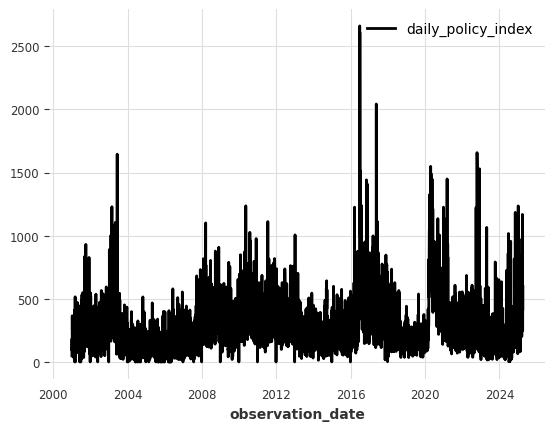

In [8]:
economic_uncertainty_UK = data_ts[5]
economic_uncertainty_UK.plot()
plt.show()

In [9]:
df = data_ts[5].to_dataframe()
print(df.describe(percentiles=[.1, .25, .5, .75, .9]))
print("var    %.6f" % np.var(df))

component  daily_policy_index
count             8859.000000
mean               279.157283
std                192.381231
min                  0.010000
10%                 95.480000
25%                150.335000
50%                235.340000
75%                361.290000
90%                513.022000
max               2660.720000
var    37006.360121


C:\Users\Avey\miniforge3\envs\astp\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\3121424607.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("var    %.6f" % np.var(df))


C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\1880584310.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,


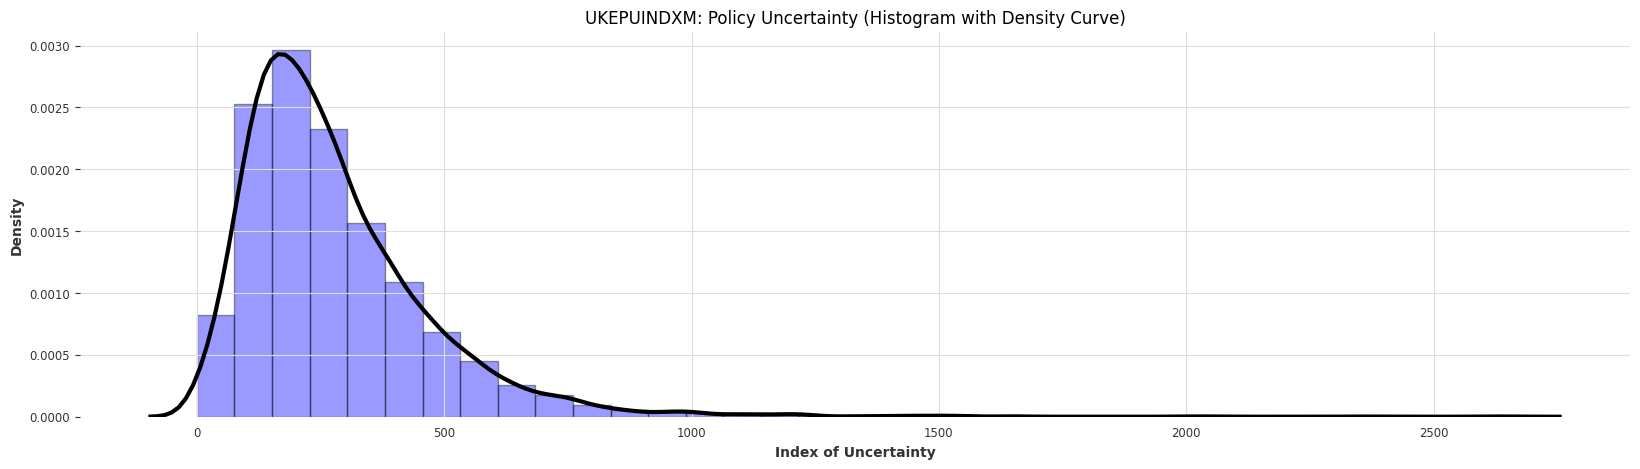

In [10]:
plt.figure(figsize=(20,5))
sns.distplot(df,
             bins = 35, color='blue',
             hist = True, hist_kws={'edgecolor':'black'},
             kde = True, kde_kws={"color": "black", "lw": 3, "label": "KDE"},
             # rug = True, rug_kws={'edgecolor':'orange'}
            )
plt.title('UKEPUINDXM: Policy Uncertainty (Histogram with Density Curve)')
plt.ylabel('Density')
plt.xlabel('Index of Uncertainty')
plt.grid(True)

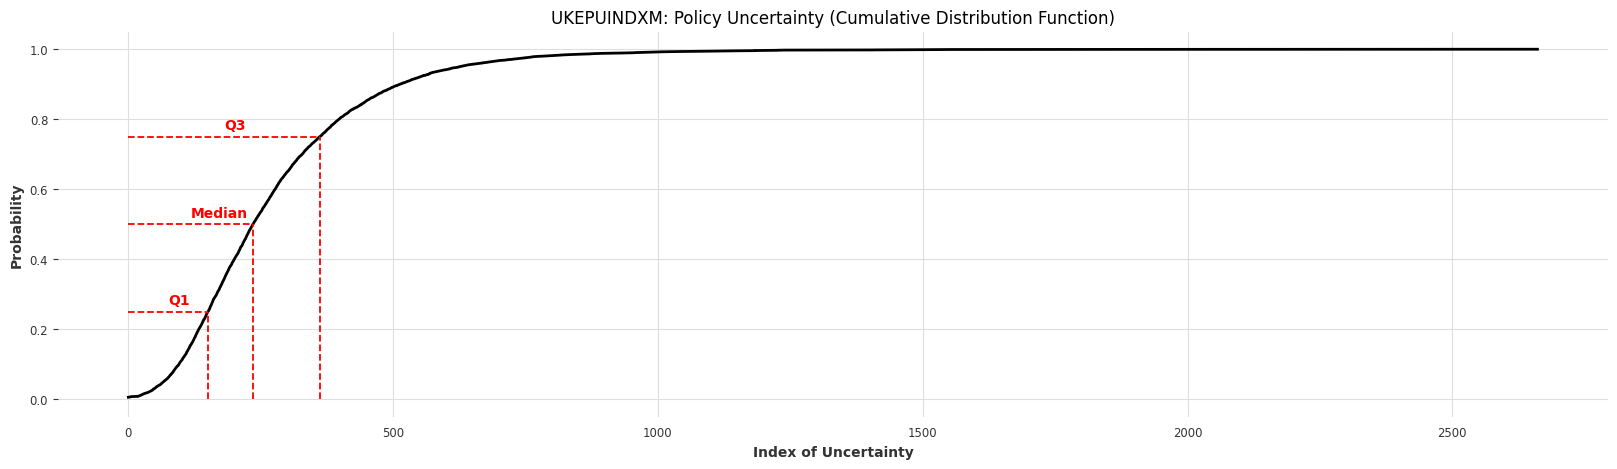

In [11]:
cdf = df[df.columns.values[0]].value_counts().sort_index().div(len(df)).cumsum()
cdf.plot(figsize=(20,5), linewidth=2)
plt.title('UKEPUINDXM: Policy Uncertainty (Cumulative Distribution Function)')
plt.ylabel('Probability')
plt.xlabel('Index of Uncertainty')
minVal = df.values.min()
q25 = np.quantile(df.values, .25)
medianVal = np.quantile(df.values, .5)
q75 = np.quantile(df.values, .75)
data=[(minVal, q25), (.25, .25), 'r', (q25, q25), (0, .25), 'r', \
      (minVal, medianVal), (.5, .5), 'r', (medianVal, medianVal), (0, .5), 'r', \
      (minVal, q75), (.75, .75), 'r', (q75, q75), (0, .75), 'r']
plt.plot(*data, ls='--');
plt.text(minVal+(q25-minVal)/2, 0.27, "Q1", color='r', fontweight='bold')
plt.text(minVal+(medianVal-minVal)/2, 0.52, "Median", color='r', fontweight='bold')
plt.text(minVal+(q75-minVal)/2, 0.77, "Q3", color='r',  fontweight='bold')
plt.grid(True)

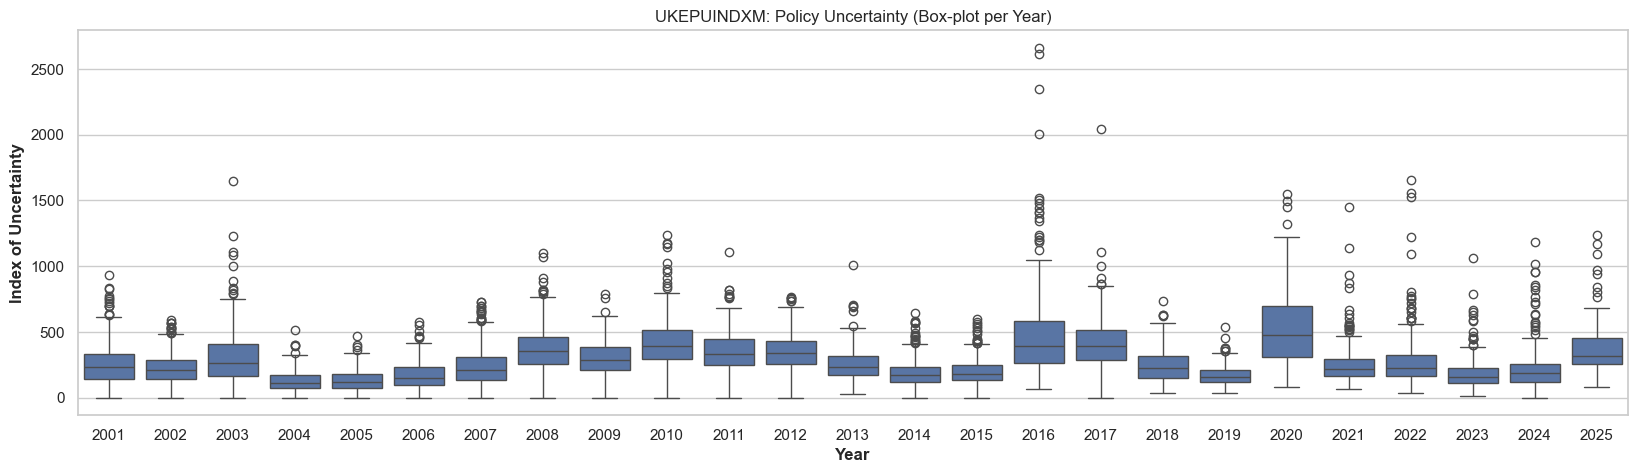

In [12]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set(style="whitegrid")
box_plot = sns.boxplot(x=df.index.year, y=df.columns.values[0], data=df);
box_plot.set(xlabel='Year', ylabel='Index of Uncertainty', title='UKEPUINDXM: Policy Uncertainty (Box-plot per Year)');

Podemos perceber que o ano com maior variação é o de 2016, seguido de anos com índices de incerteza maiores. Esta grande variação em 2016 deve-se ao facto de, a 23 de junho de 2016, ter sido convocada a discussão da permanência ou não do país à União Europeia. Com isto, a incerteza das pessoas aumentou bastante e que pôde desencadear em flutuações maiores nos anos seguintes. 

Pegando nisto que foi dito, conseguimos notar também o ano de 2020 e 2021. O ano de 2020 foi o ano do Brexit (em janeiro), mas também do COVID, o que pode explicar uma incerteza mais baixa porque o COVID pode ter amenizado a incerteza das pessoas em relação à decisão do Brexit.

Vamos estudar a variação disto ao longo dos meses de 2016 e de 2020 para comprovar esta tese.

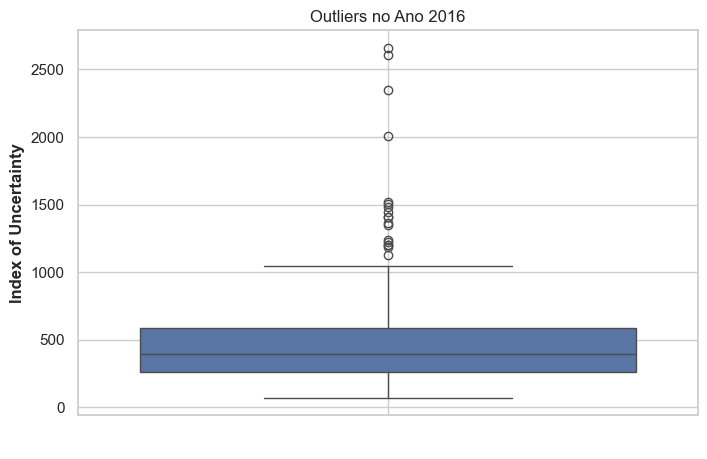

Outliers no ano 2016:
 component         daily_policy_index
observation_date                    
2016-03-16                   1225.36
2016-06-24                   2350.45
2016-06-25                   2660.72
2016-06-26                   1500.87
2016-06-27                   2610.06
2016-06-28                   2005.45
2016-06-29                   1408.76
2016-06-30                   1183.65
2016-07-01                   1517.45
2016-07-02                   1347.30
2016-07-03                   1481.98
2016-07-05                   1364.03
2016-07-06                   1196.78
2016-07-14                   1126.68
2016-07-28                   1238.78
2016-11-04                   1441.63
2016-11-23                   1200.17
2016-11-24                   1407.20


In [13]:
def outliers_ano(ano_especifico):
    df_ano = df[df.index.year == ano_especifico]
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_ano[df_ano.columns[0]])
    plt.title(f'Outliers no Ano {ano_especifico}')
    plt.xlabel(' ')
    plt.ylabel('Index of Uncertainty')
    plt.grid(True)
    plt.show()

    Q1 = df_ano[df_ano.columns[0]].quantile(0.25)
    Q3 = df_ano[df_ano.columns[0]].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df_ano[(df_ano[df_ano.columns[0]] < limite_inferior) | 
                    (df_ano[df_ano.columns[0]] > limite_superior)]

    print(f"Outliers no ano {ano_especifico}:\n", outliers)
outliers_ano(2016)

C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\1380650659.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box_plot.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);


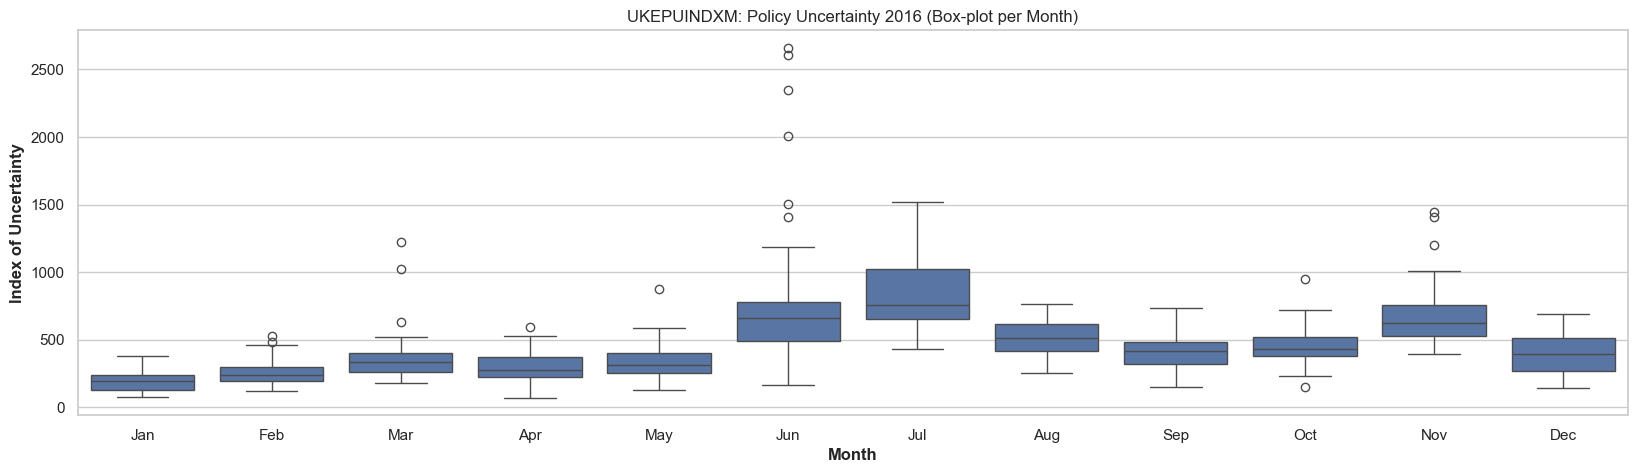

In [14]:
# resolved

def months_boxplot_ano(ano_especifico):
    df_ano = df[df.index.year == ano_especifico]
    sns.set(rc={'figure.figsize':(20,5)})
    sns.set(style="whitegrid")
    box_plot = sns.boxplot(x=df_ano.index.month, y=df_ano.columns.values[0], data=df_ano);
    box_plot.set(xlabel='Month', ylabel='Index of Uncertainty', title='UKEPUINDXM: Policy Uncertainty 2016 (Box-plot per Month)');
    #box_plot.set_xticklabels(['Jan', 'Apr', 'Jul', 'Oct']);
    box_plot.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
months_boxplot_ano(2016)

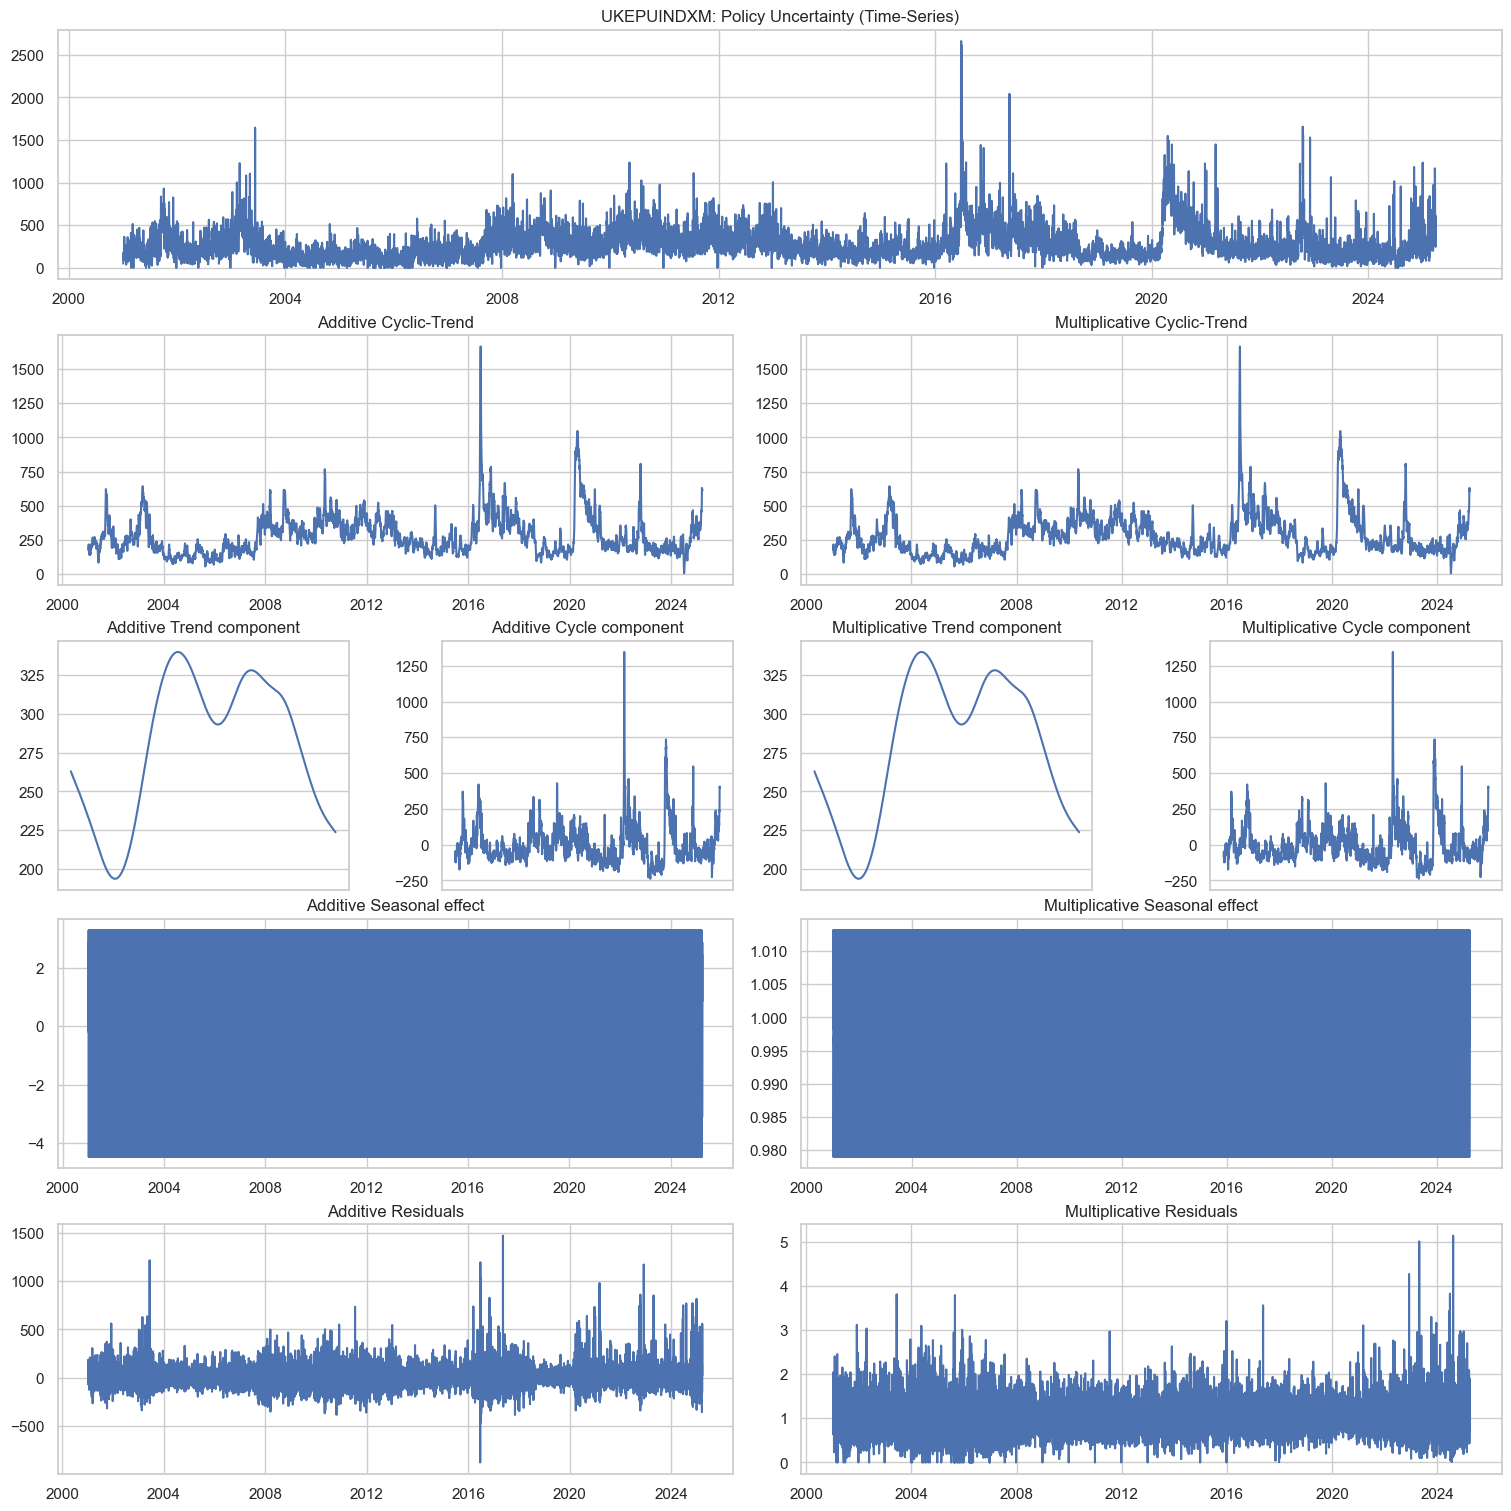

Time-Series Level is component
daily_policy_index    279.16
dtype: float64

Additive Time Series
Strenght of Trend: 0.3079
Strenght of Seasonality: 0.0000

Multiplicative Time Series
Strenght of Trend: 1.0000
Strenght of Seasonality: 0.0000


In [15]:
show_decompose(df, seasonal_periods = 12, title="UKEPUINDXM: Policy Uncertainty")

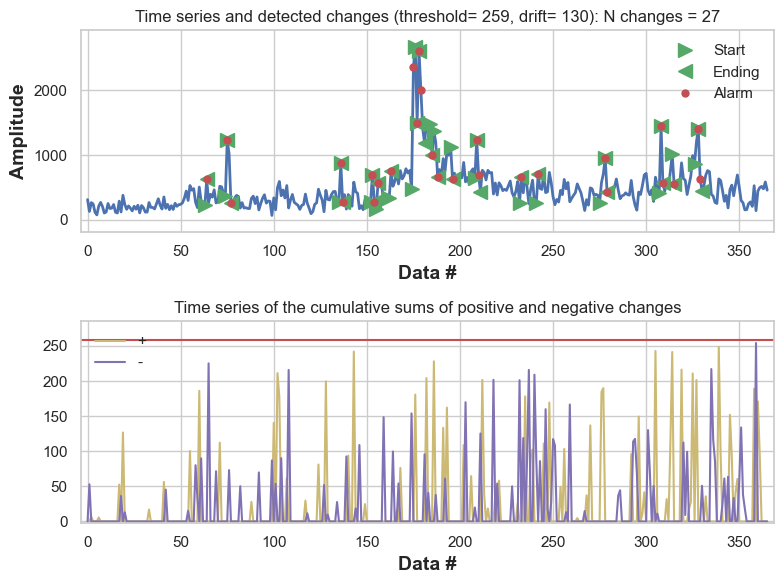

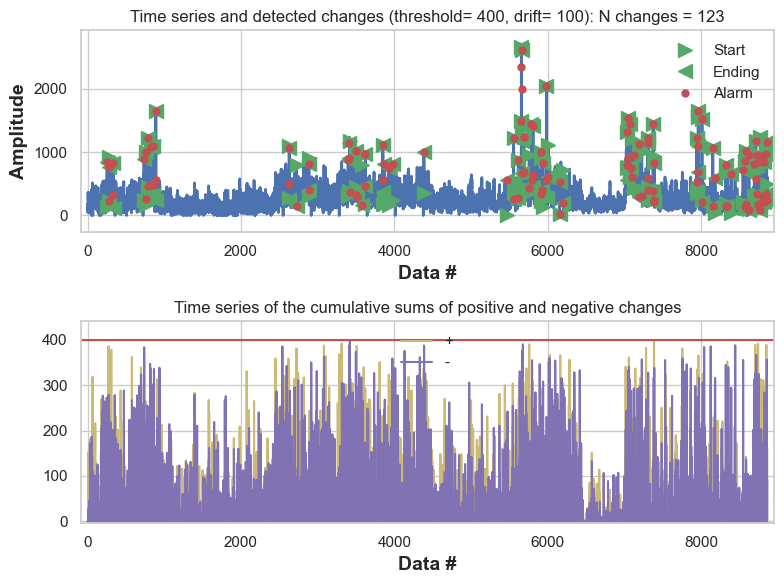

In [16]:
# ver para o ano de 2016 APENAS!!
def detect_cusum_ano(ano_especifico):
    df_ano = df[df.index.year == ano_especifico]
    threshold = (max(df_ano.values)-min(df_ano.values))/10 # 40
    drift = (max(df_ano.values)-min(df_ano.values))/20 # 80
    detect_cusum(df_ano.values, threshold, drift, True, True);
detect_cusum_ano(2016)

# TODO: ver melhor threshold e drift
#Manual values
threshold=400 #increases the amplitude, raising the alarm zone barrier
drift = 100;

detect_cusum(df.values, threshold, drift, True, True);

In [17]:
# TODO: mudar nome das hipoteses
h0_time_series(df, serie = "UKDaily: Policy Uncertainty")

Estudar normalidade
Kurtosis Test for UKDaily: Policy Uncertainty
Statistic: 41.9201
p-value: 0.0000
Kurtosis value: 12.6535
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Skew Test for UKDaily: Policy Uncertainty
Statistic: 55.5720
p-value: 0.0000
Skewness value: 2.3241
Conclusion: Reject H0: Data is skewed
------------------------------------------------------
Jarque-Bera Test for UKDaily: Policy Uncertainty
Statistic: 67076.0993
p-value: 0.0000
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Kolmogorov-Smirnov Test for UKDaily: Policy Uncertainty
Statistic: 0.9934
p-value: 0.0000
Conclusion: Reject H0: Data is not from a normal distribution
------------------------------------------------------
Lagrange Multiplier Test for UKDaily: Policy Uncertainty
Statistic: 3814.4327
p-value: 0.0000
Conclusion: Reject H0: Heteroscedasticity detected
-------------------------------------------------

# <a class='anchor' id='3.2'></a>

> # **3.2. Job postings on indeed in the UK** 

In [18]:
df_jobPostings = data_ts[0].to_dataframe()
print(df_jobPostings.describe(percentiles=[.1, .25, .5, .75, .9]))
print("var    %.6f" % np.var(df_jobPostings))

component  Job Postings on Indeed in the United Kingdom
count                                       1883.000000
mean                                         113.400515
std                                           39.581486
min                                           36.200000
10%                                           58.068000
25%                                           85.315000
50%                                          108.070000
75%                                          146.260000
90%                                          166.950000
max                                          174.820000
var    1565.862032


C:\Users\Avey\miniforge3\envs\astp\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\1134134872.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("var    %.6f" % np.var(df_jobPostings))


C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\256480645.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\256480645.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano["month"] = df_ano.index.month
C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\256480645.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of tic

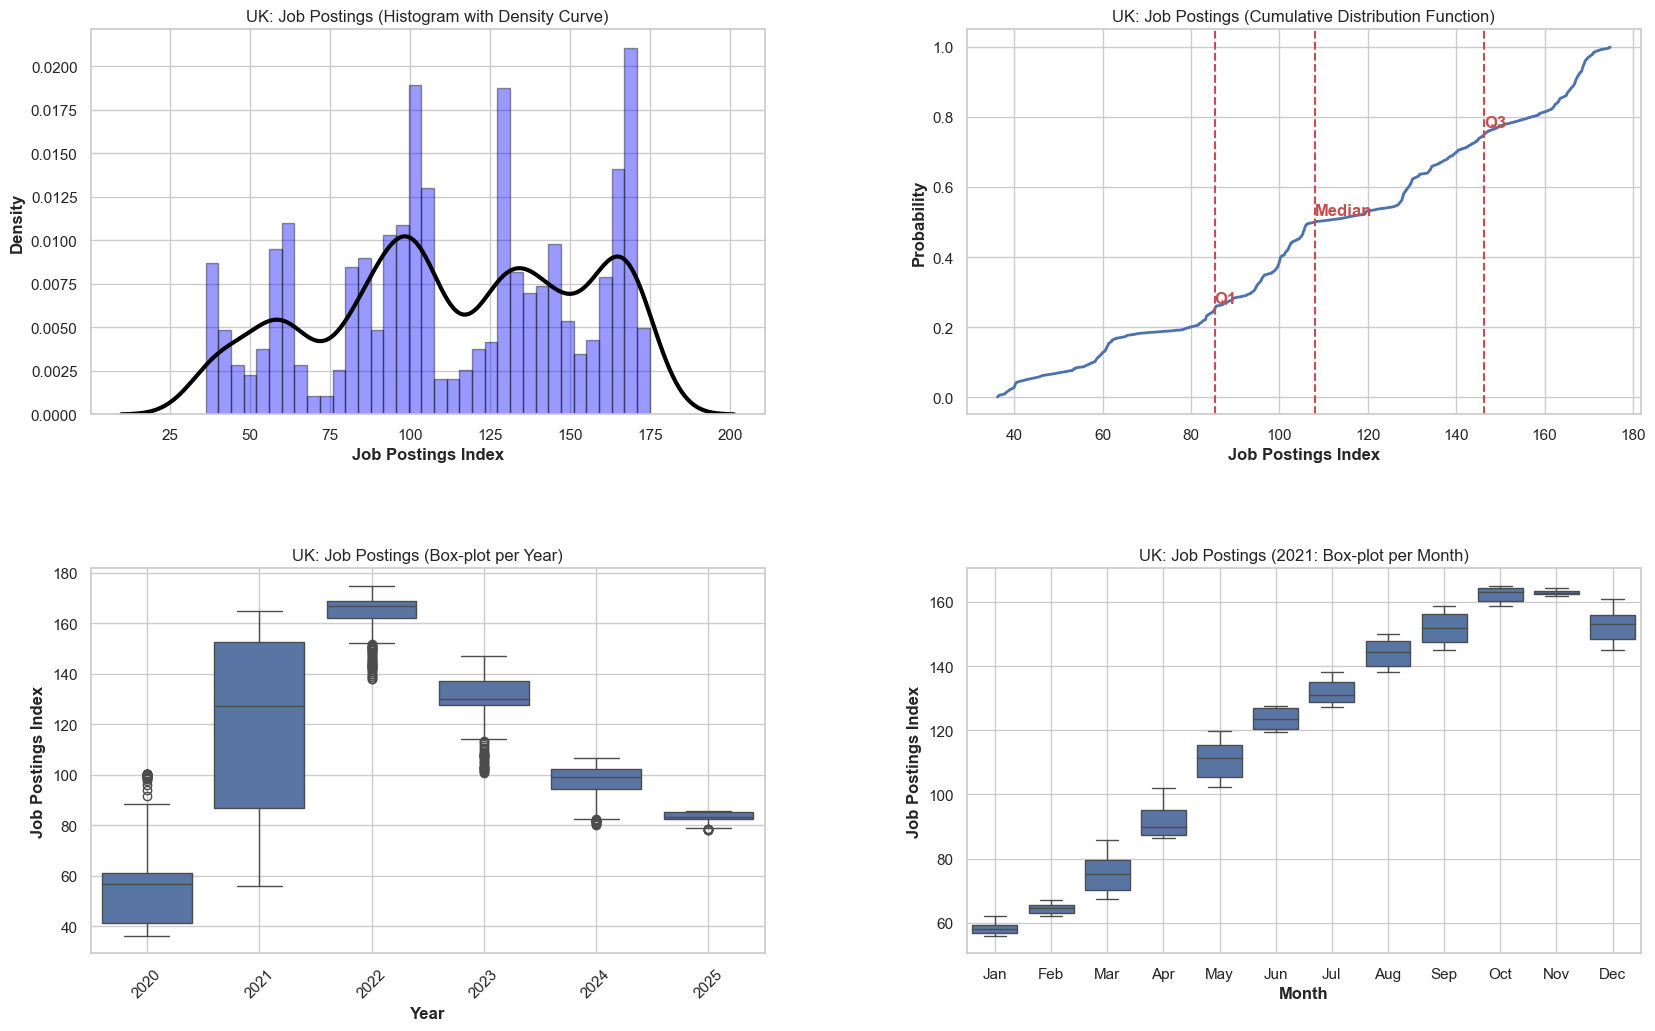

In [19]:
def stats_series(dataframe, serie=" ", label_serie=" ", ano_mensal=None):
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # grid 2x2
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # --- 1. Histogram + KDE ---
    '''sns.histplot(
        data=dataframe,
        x=dataframe.columns[0],
        bins=35,
        color='blue',
        edgecolor='black',
        ax=axes[0, 0]
    )
    sns.kdeplot(
        data=dataframe,
        x=dataframe.columns[0],
        color='black',
        lw=3,
        label='KDE',
        ax=axes[0, 0]
    )'''

    # TODO: deprecated!!!
    sns.distplot(
        dataframe,
        bins=35,
        color='blue',hist = True, hist_kws={'edgecolor':'black'},
        kde=True,
        kde_kws={"color": "black", "lw": 3, "label": "KDE"},
        ax=axes[0, 0]
    )

    axes[0, 0].set_title(f"{serie} (Histogram with Density Curve)")
    axes[0, 0].set_xlabel(label_serie)
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].grid(True)

    # --- 2. Cumulative Distribution Function (CDF) ---
    cdf = dataframe[dataframe.columns[0]].value_counts().sort_index().div(len(dataframe)).cumsum()
    cdf.plot(ax=axes[0, 1], linewidth=2)
    axes[0, 1].set_title(f"{serie} (Cumulative Distribution Function)")
    axes[0, 1].set_xlabel(label_serie)
    axes[0, 1].set_ylabel("Probability")
    axes[0, 1].grid(True)

    # Quartis e anotações
    minVal = dataframe.values.min()
    q25 = np.quantile(dataframe.values, 0.25)
    medianVal = np.quantile(dataframe.values, 0.5)
    q75 = np.quantile(dataframe.values, 0.75)

    for q, label, y in zip([q25, medianVal, q75], ['Q1', 'Median', 'Q3'], [0.27, 0.52, 0.77]):
        axes[0, 1].axvline(q, color='r', linestyle='--')
        axes[0, 1].text(q, y, label, color='r', fontweight='bold')

    # --- 3. Boxplot por ano ---
    dataframe = dataframe.copy()
    dataframe["year"] = dataframe.index.year
    sns.boxplot(
        x="year",
        y=dataframe.columns[0],
        data=dataframe,
        ax=axes[1, 0]
    )
    axes[1, 0].set_title(f"{serie} (Box-plot per Year)")
    axes[1, 0].set_xlabel("Year")
    axes[1, 0].set_ylabel(label_serie)
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True)

    # --- 4. Boxplot por Mês de um ano específico ---
    if ano_mensal:
        df_ano = dataframe[dataframe["year"] == ano_mensal]
        df_ano["month"] = df_ano.index.month
        sns.boxplot(
            x="month",
            y=dataframe.columns[0],
            data=df_ano,
            ax=axes[1, 1]
        )
        axes[1, 1].set_title(f"{serie} ({ano_mensal}: Box-plot per Month)")
        axes[1, 1].set_xlabel("Month")
        axes[1, 1].set_ylabel(label_serie)
        axes[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        axes[1, 1].grid(True)
    else:
        axes[1, 1].axis('off')

    plt.show()

stats_series(df_jobPostings, serie="UK: Job Postings", label_serie="Job Postings Index", ano_mensal=2021)

Parece haver alguma sazonalidade.

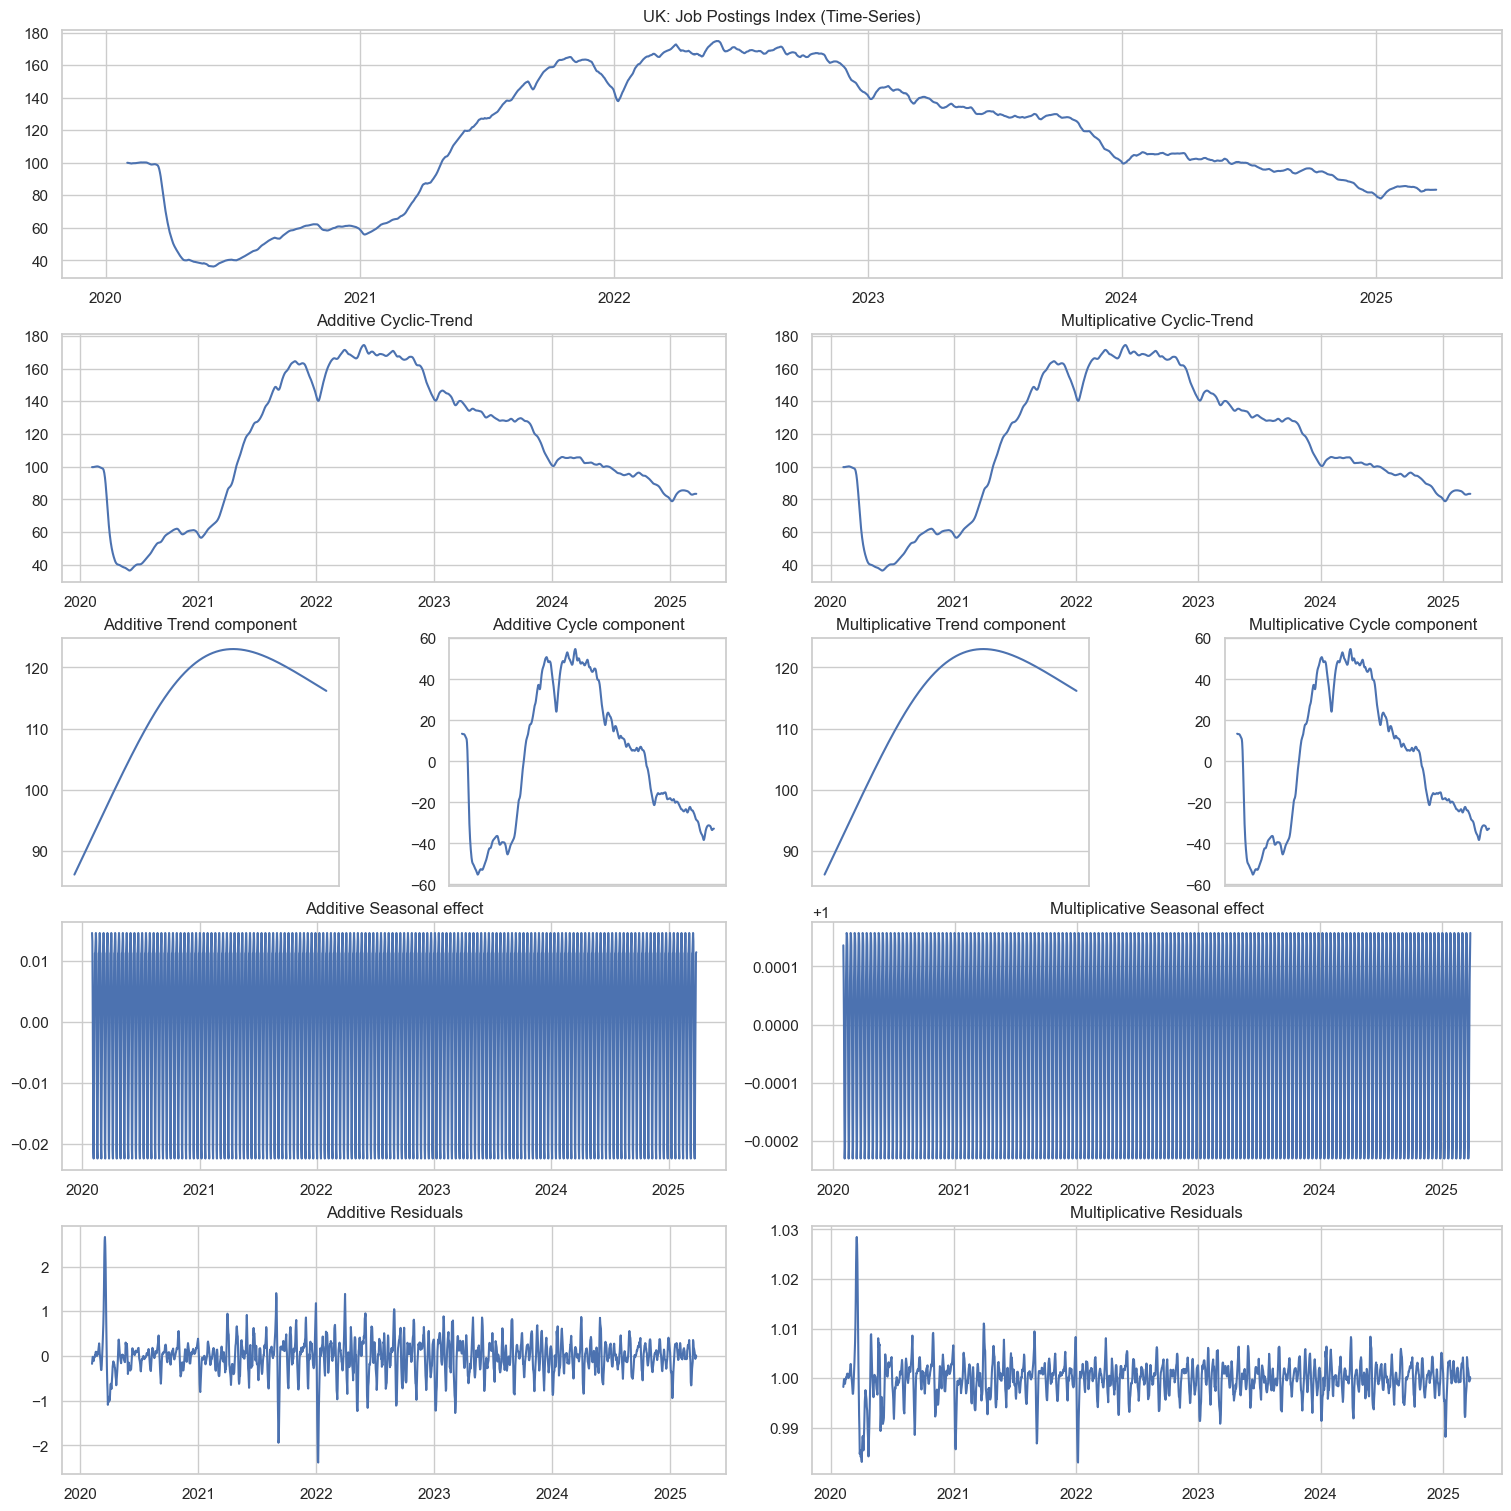

Time-Series Level is component
Job Postings on Indeed in the United Kingdom    113.4
dtype: float64

Additive Time Series
Strenght of Trend: 0.9999
Strenght of Seasonality: 0.0000

Multiplicative Time Series
Strenght of Trend: 1.0000
Strenght of Seasonality: 0.0000


In [20]:
show_decompose(df_jobPostings, seasonal_periods=12, title="UK: Job Postings Index")

Para estudar a sazonalidade foram utilizadas as seguintes fontes de pesquisa:
- https://sylwiagrudkowska.github.io/JDemetra-documentation/pages/case-studies/seasonalitytests.html
- https://www.statology.org/kruskal-wallis-test-python/
- Doc em python: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [21]:
from scipy.stats import kruskal

df['month'] = df.index.month
grupos = [grupo[1].values for grupo in df.groupby('month')[df.columns[0]]]
stat, p = kruskal(*grupos)

print(f"Kruskal-Wallis p-value: {p:.4f}")
if p < 0.05:
    print("-> A mediana dos grupos/entre anos é diferente.")
else:
    print("-> A mediana dos grupos/entre anos é a mesma.")

Kruskal-Wallis p-value: 0.0000
-> A mediana dos grupos/entre anos é diferente.


C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\3973211721.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean()
C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\3973211721.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", len(np.unique(z)))


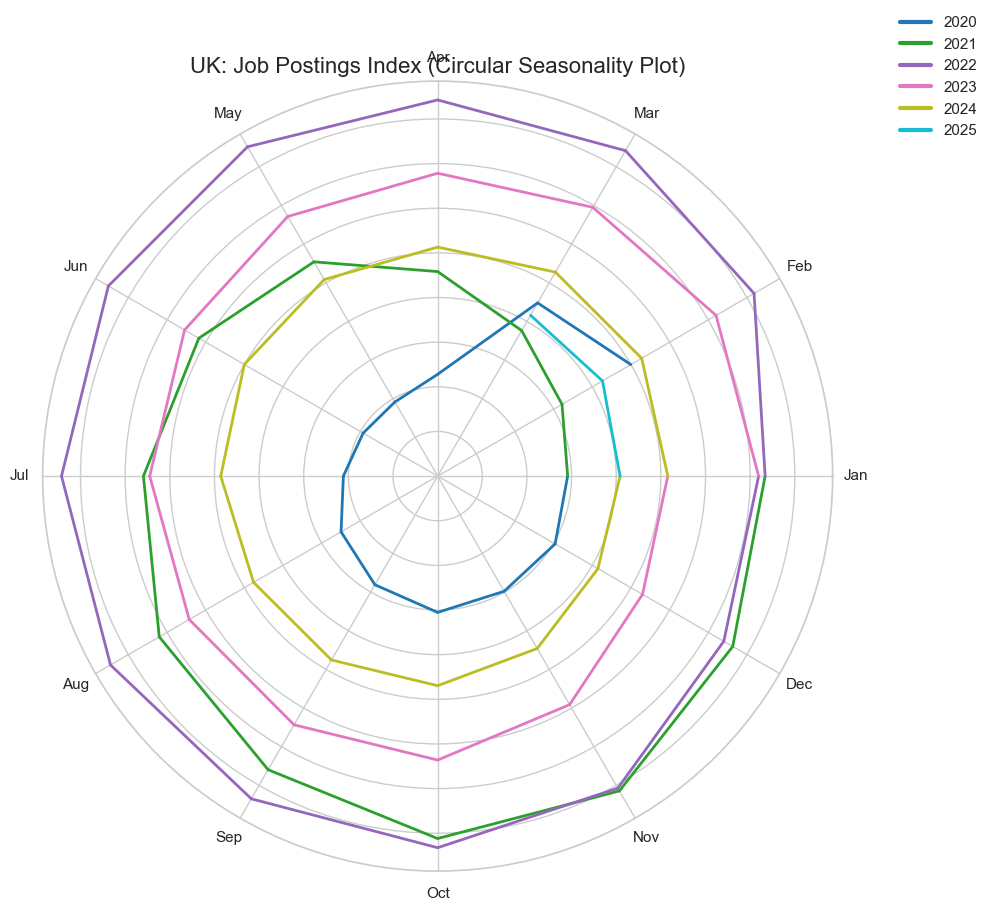

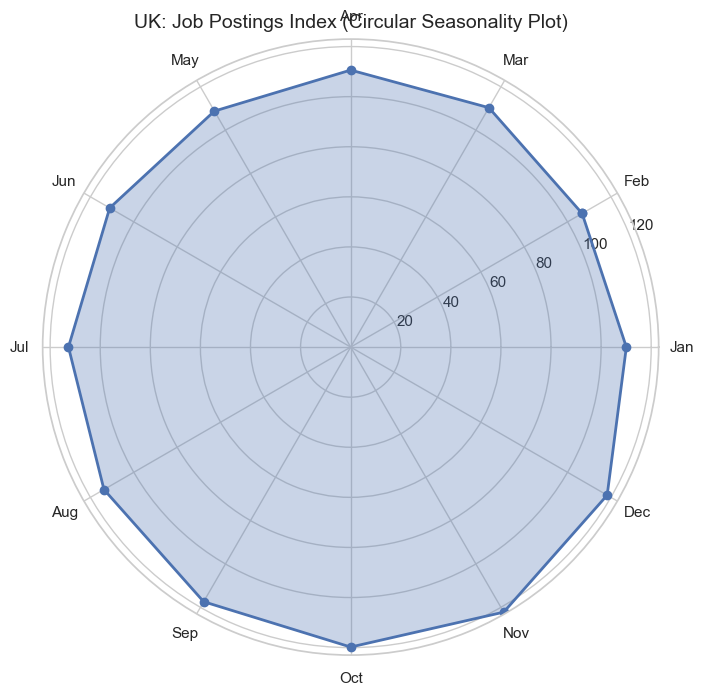

In [22]:
def plot_circular_seasonality(df, title="Circular Seasonality Plot"):
    df = df.copy()
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["angle"] = df["month"] * (2 * np.pi / 12)  # transforma meses em radianos

    monthly_mean = df.groupby("month")[df.columns[0]].mean()

    months = np.arange(1, 13) # 12
    angles = months * (2 * np.pi / 12)
    values = monthly_mean.values
    angles = np.append(angles, angles[0]) 
    values = np.append(values, values[0])

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
    ax.plot(angles, values, marker='o', linewidth=2)
    ax.fill(angles, values, alpha=0.3)

    ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_title(title, va='bottom', fontsize=14)
    ax.grid(True)

    plt.show()


def plot_spiral_continuous(df, title="Spiral Time Series (Continuous, Colored by Year)"):
    df = df.copy()
    df.index = pd.to_datetime(df.index)

    
    df = df.resample("M").mean()
    df = df[df.first_valid_index():]  # começa no primeiro valor real
    df = df.dropna()
    
    df['year'] = df.index.year
    df['month'] = df.index.month
    df["t"] = np.arange(len(df))

    # começar em fevereiro de 2020 para o job listings
    start_month = df.index[0].month
    df["theta"] = 2 * np.pi * ((df["t"] + start_month - 1) % 12) / 12

    
    df["r"] = df[df.columns[0]].values # raio é o valor da série

    theta = df["theta"].values
    r = df["r"].values
    z = df["year"].values

    # Cores por ano
    norm = mcolors.Normalize(vmin=z.min(), vmax=z.max())
    cmap = cm.get_cmap("tab10", len(np.unique(z)))
    colors = cmap(norm(z))

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
    for i in range(len(df) - 1):
        ax.plot(theta[i:i+2], r[i:i+2], color=colors[i], linewidth=2)

    ax.set_title(title, fontsize=16)
    ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_yticklabels([])
    ax.grid(True)

    years = np.unique(z)
    legend_handles = [
        plt.Line2D([0], [0], color=cmap(norm(year)), lw=3, label=str(year))
        for year in years
    ]
    ax.legend(handles=legend_handles, loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.tight_layout()
    plt.show()

plot_spiral_continuous(df_jobPostings, title="UK: Job Postings Index (Circular Seasonality Plot)")
plot_circular_seasonality(df_jobPostings, title="UK: Job Postings Index (Circular Seasonality Plot)")

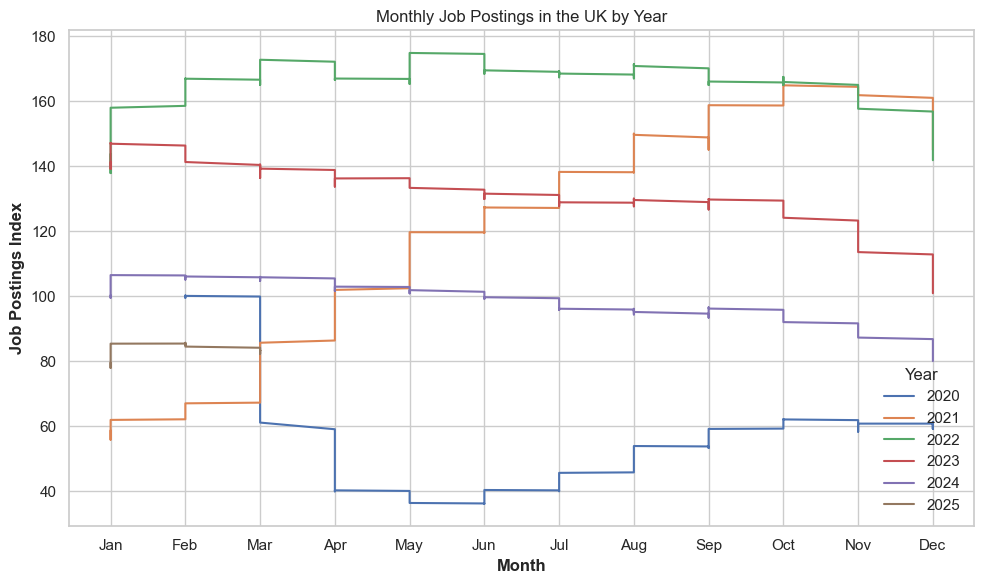

In [23]:
df_jobPostings["year"] = df_jobPostings.index.year
df_jobPostings["month"] = df_jobPostings.index.month
plt.figure(figsize=(10, 6))
for year in df_jobPostings["year"].unique():
    data = df_jobPostings[df_jobPostings["year"] == year]
    plt.plot(data["month"], data[df_jobPostings.columns[0]], label=str(year))

plt.xlabel("Month")
plt.ylabel("Job Postings Index")
plt.title("Monthly Job Postings in the UK by Year")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
h0_time_series(df_jobPostings, serie = "UK: Job Postings Index")

Estudar normalidade
Kurtosis Test for UK: Job Postings Index
Statistic: -23.2414
p-value: 0.0000
Kurtosis value: -1.0481
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Skew Test for UK: Job Postings Index
Statistic: -3.5339
p-value: 0.0004
Skewness value: -0.2006
Conclusion: Reject H0: Data is skewed
------------------------------------------------------
Jarque-Bera Test for UK: Job Postings Index
Statistic: 988.7374
p-value: 0.0000
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Kolmogorov-Smirnov Test for UK: Job Postings Index
Statistic: 1.0000
p-value: 0.0000
Conclusion: Reject H0: Data is not from a normal distribution
------------------------------------------------------
Lagrange Multiplier Test for UK: Job Postings Index
Statistic: 1872.9683
p-value: 0.0000
Conclusion: Reject H0: Heteroscedasticity detected
------------------------------------------------------
Brock Dechert and S

D:\OneDrive - ISCTE-IUL\MCD\Projetos\ASTP_Projeto\src\functions_EDA.py:317: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns.values[0]].values, regression='c')


# <a class='anchor' id='3.3'></a>

> # **3.3. Interest Rates: Long-Term Government Bond Yields: 10 years** 

In [25]:
df_interestRates = data_ts[1].to_dataframe()
print(df_interestRates.describe(percentiles=[.1, .25, .5, .75, .9]))
print("var    %.6f" % np.var(df_interestRates))

component  Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for United Kingdom
count                                             782.000000                                                       
mean                                                6.960016                                                       
std                                                 3.874890                                                       
min                                                 0.209400                                                       
10%                                                 1.738350                                                       
25%                                                 4.290375                                                       
50%                                                 6.420000                                                       
75%                                                 9.875000            

C:\Users\Avey\miniforge3\envs\astp\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\3874389060.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("var    %.6f" % np.var(df_interestRates))


C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\256480645.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


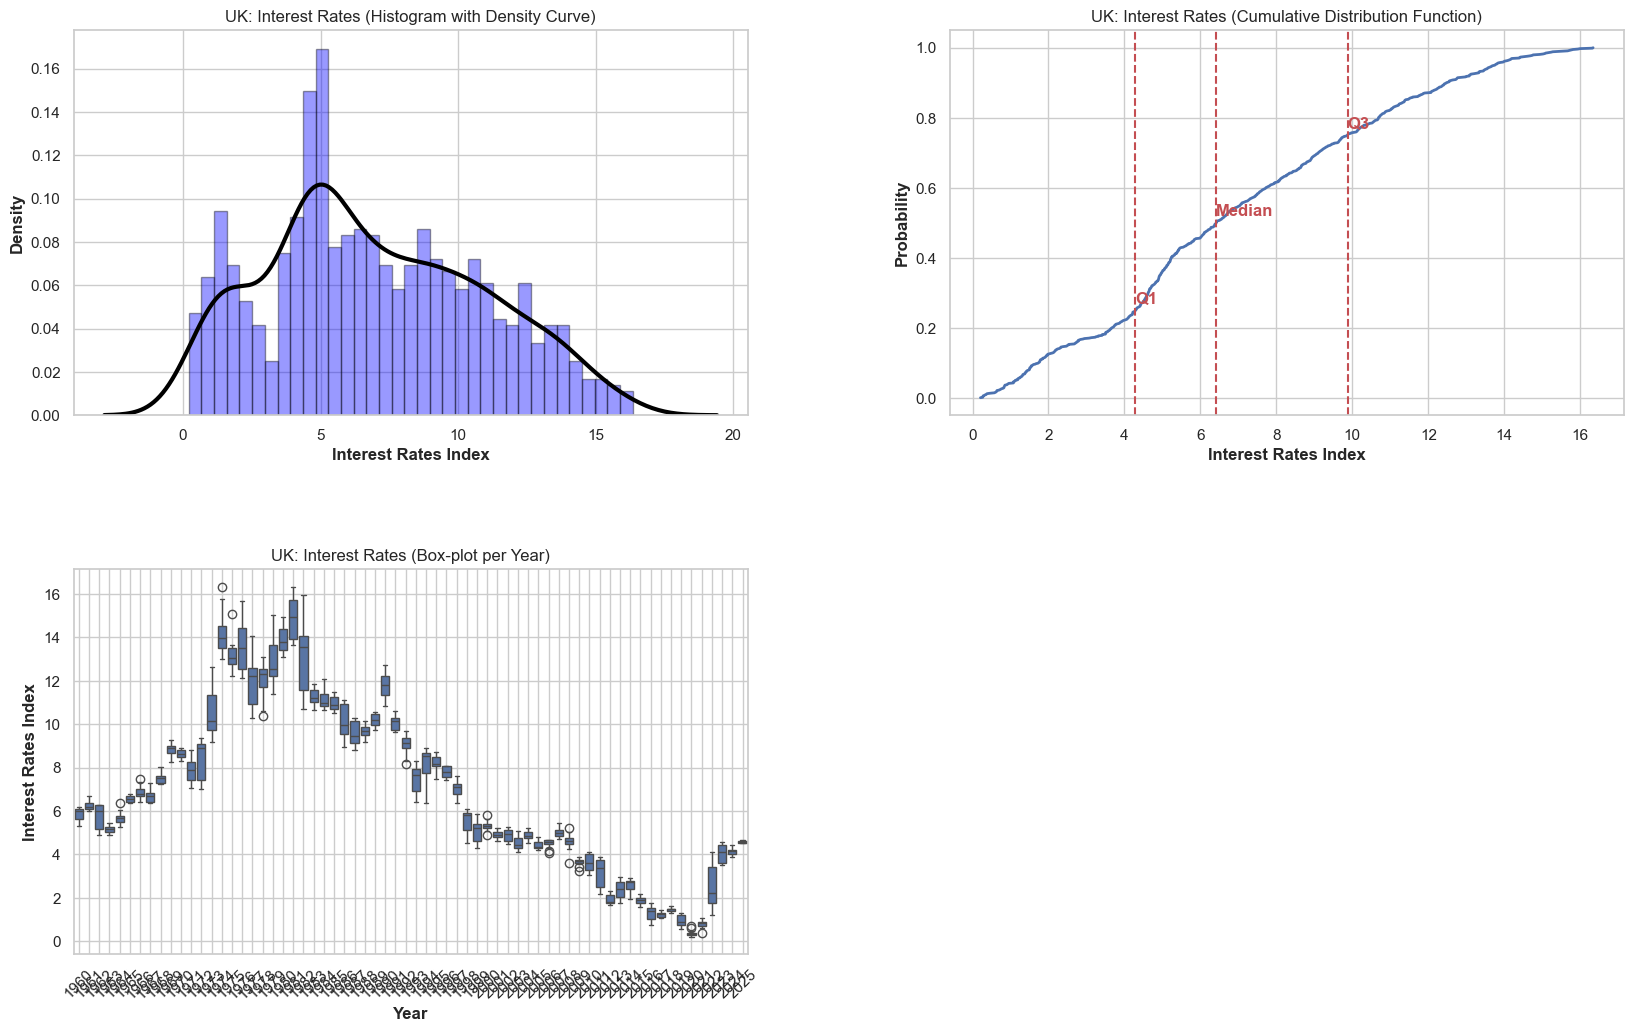

In [26]:
stats_series(df_interestRates, serie="UK: Interest Rates", label_serie="Interest Rates Index") # ano mensal aqui é None

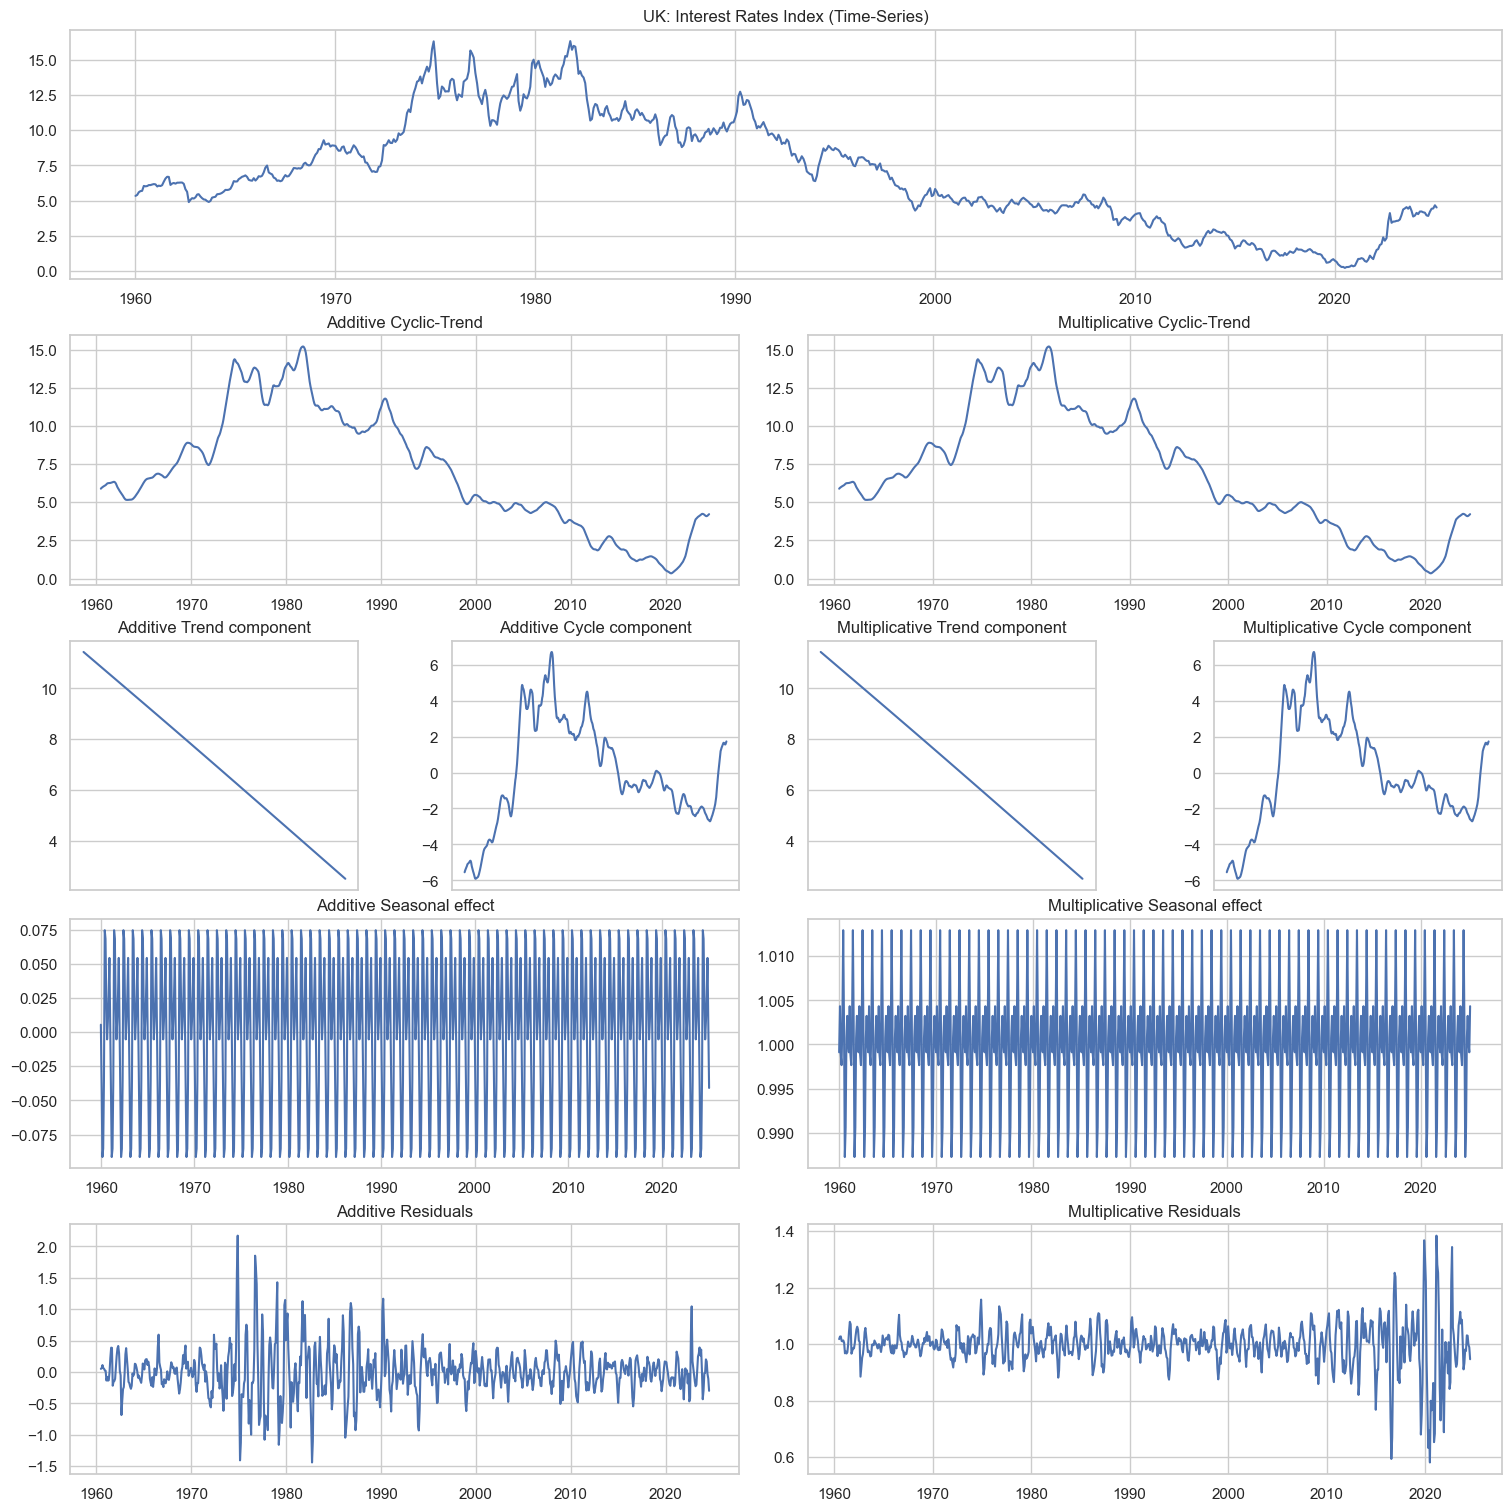

Time-Series Level is component
Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for United Kingdom    6.96
dtype: float64

Additive Time Series
Strenght of Trend: 0.9906
Strenght of Seasonality: 0.0000

Multiplicative Time Series
Strenght of Trend: 0.9996
Strenght of Seasonality: 0.0000


In [27]:
show_decompose(df_interestRates, seasonal_periods=12, title="UK: Interest Rates Index")

In [28]:
h0_time_series(df_jobPostings, serie = "UK: Job Postings Index")

Estudar normalidade
Kurtosis Test for UK: Job Postings Index
Statistic: -23.2414
p-value: 0.0000
Kurtosis value: -1.0481
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Skew Test for UK: Job Postings Index
Statistic: -3.5339
p-value: 0.0004
Skewness value: -0.2006
Conclusion: Reject H0: Data is skewed
------------------------------------------------------
Jarque-Bera Test for UK: Job Postings Index
Statistic: 988.7374
p-value: 0.0000
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Kolmogorov-Smirnov Test for UK: Job Postings Index
Statistic: 1.0000
p-value: 0.0000
Conclusion: Reject H0: Data is not from a normal distribution
------------------------------------------------------
Lagrange Multiplier Test for UK: Job Postings Index
Statistic: 1872.9683
p-value: 0.0000
Conclusion: Reject H0: Heteroscedasticity detected
------------------------------------------------------
Brock Dechert and S

D:\OneDrive - ISCTE-IUL\MCD\Projetos\ASTP_Projeto\src\functions_EDA.py:317: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns.values[0]].values, regression='c')


Temos de diferenciar a série para esta se tornar estacionária.

# <a class='anchor' id='3.4'></a>

> # **3.4. Consumer Price Indices: Total for UK** 

In [29]:
df_priceIndices = data_ts[4].to_dataframe()
print(df_priceIndices.describe(percentiles=[.1, .25, .5, .75, .9]))
print("var    %.6f" % np.var(df_priceIndices))

component  Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for United Kingdom
count                                             841.000000                                                
mean                                               53.069186                                                
std                                                38.544159                                                
min                                                 4.859513                                                
10%                                                 6.000088                                                
25%                                                 9.852144                                                
50%                                                52.400000                                                
75%                                                83.400000                                                
90%                

C:\Users\Avey\miniforge3\envs\astp\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\4177955523.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("var    %.6f" % np.var(df_priceIndices))


C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\256480645.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


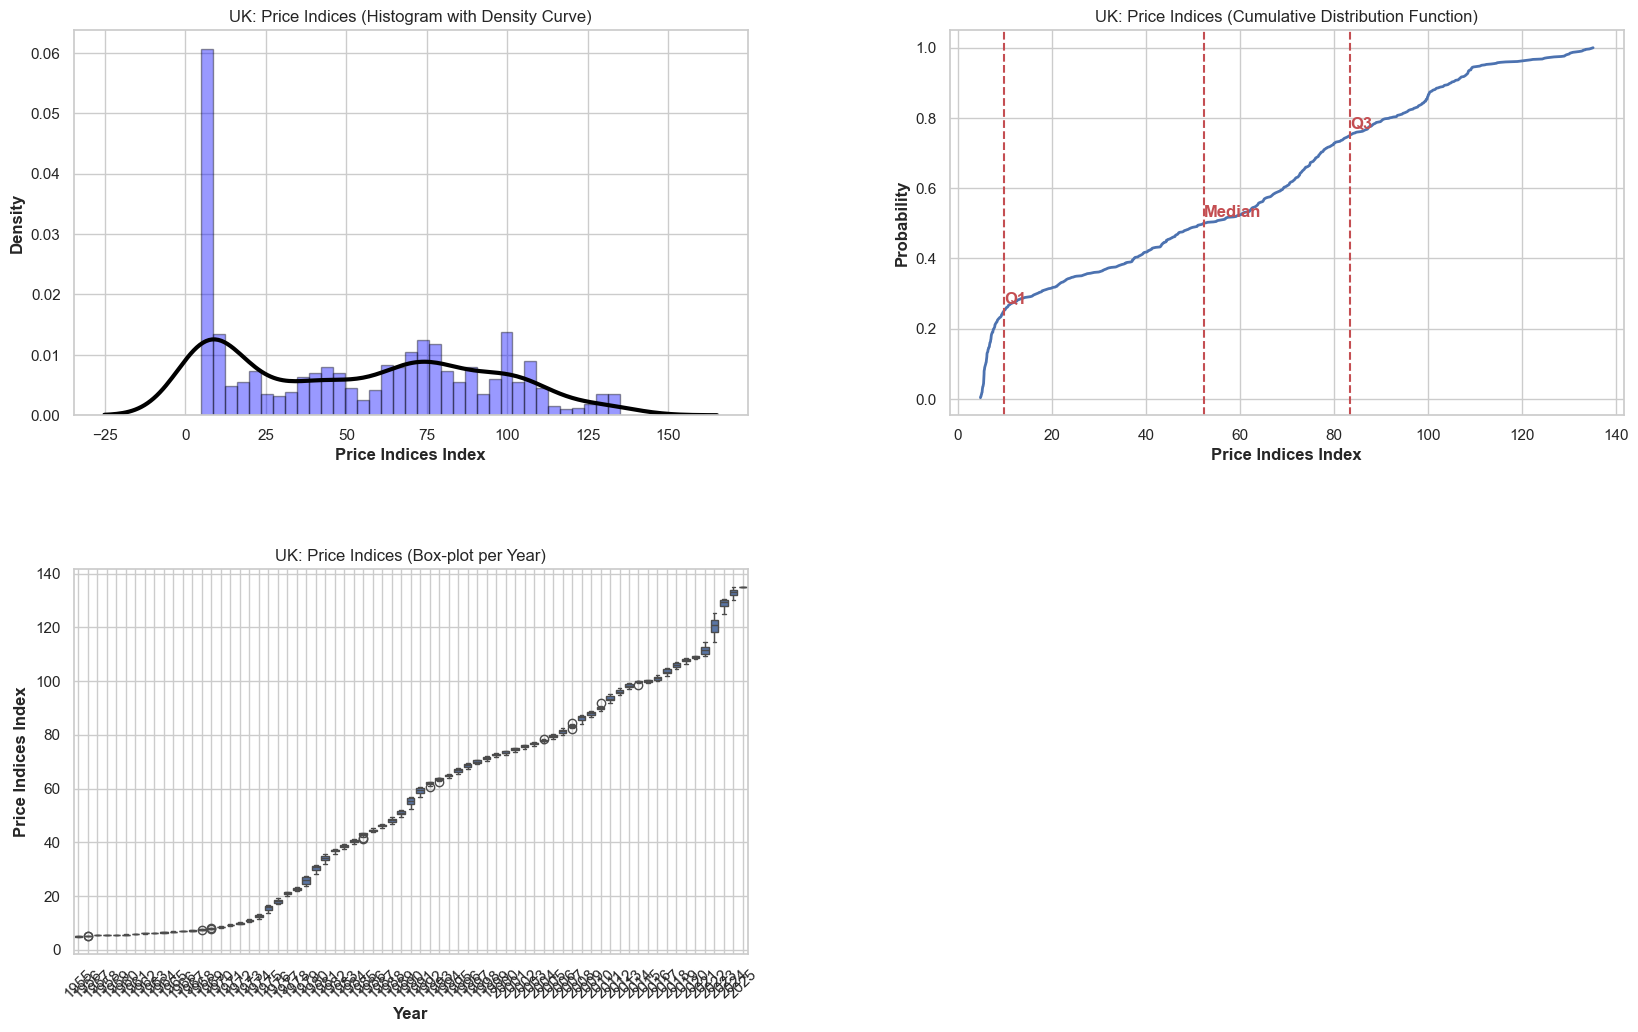

In [30]:
stats_series(df_priceIndices, serie="UK: Price Indices", label_serie="Price Indices Index") # serie não é mensal

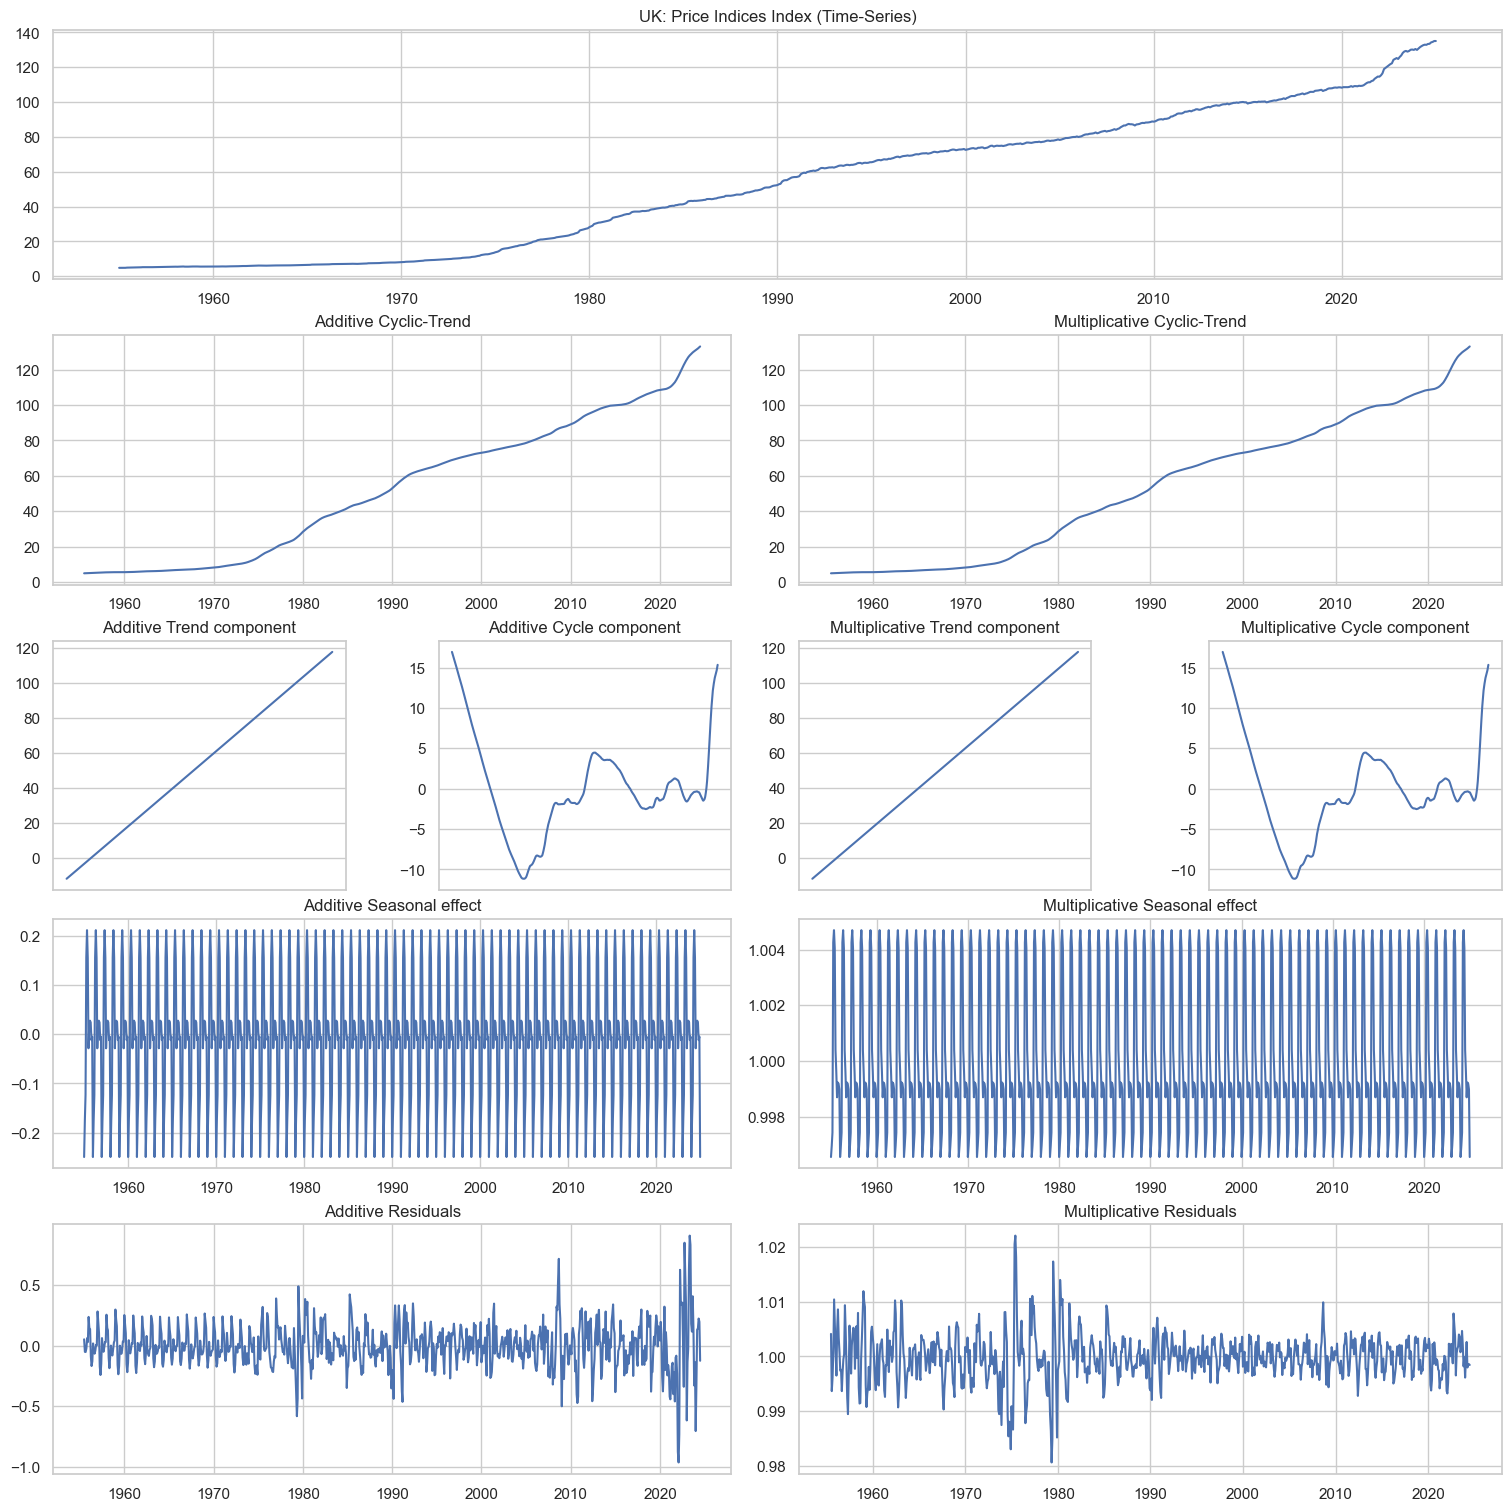

Time-Series Level is component
Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for United Kingdom    53.07
dtype: float64

Additive Time Series
Strenght of Trend: 1.0000
Strenght of Seasonality: 0.0000

Multiplicative Time Series
Strenght of Trend: 1.0000
Strenght of Seasonality: 0.0000


In [31]:
show_decompose(df_priceIndices, seasonal_periods=12, title="UK: Price Indices Index")

In [32]:
h0_time_series(df_priceIndices, serie = "UK: Price Indices Index")

Estudar normalidade
Kurtosis Test for UK: Price Indices Index
Statistic: -28.3932
p-value: 0.0000
Kurtosis value: -1.2353
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Skew Test for UK: Price Indices Index
Statistic: 2.3590
p-value: 0.0183
Skewness value: 0.1994
Conclusion: Reject H0: Data is skewed
------------------------------------------------------
Jarque-Bera Test for UK: Price Indices Index
Statistic: 59.0421
p-value: 0.0000
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Kolmogorov-Smirnov Test for UK: Price Indices Index
Statistic: 1.0000
p-value: 0.0000
Conclusion: Reject H0: Data is not from a normal distribution
------------------------------------------------------
Lagrange Multiplier Test for UK: Price Indices Index
Statistic: 830.9398
p-value: 0.0000
Conclusion: Reject H0: Heteroscedasticity detected
------------------------------------------------------
Brock Dechert and 

D:\OneDrive - ISCTE-IUL\MCD\Projetos\ASTP_Projeto\src\functions_EDA.py:317: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns.values[0]].values, regression='c')


# <a class='anchor' id='3.5'></a>

> # **3.5. Incerteza política dos USA** 

Text(0.5, 1.0, 'USEPUINDXD: Policy Uncertainty (USA)')

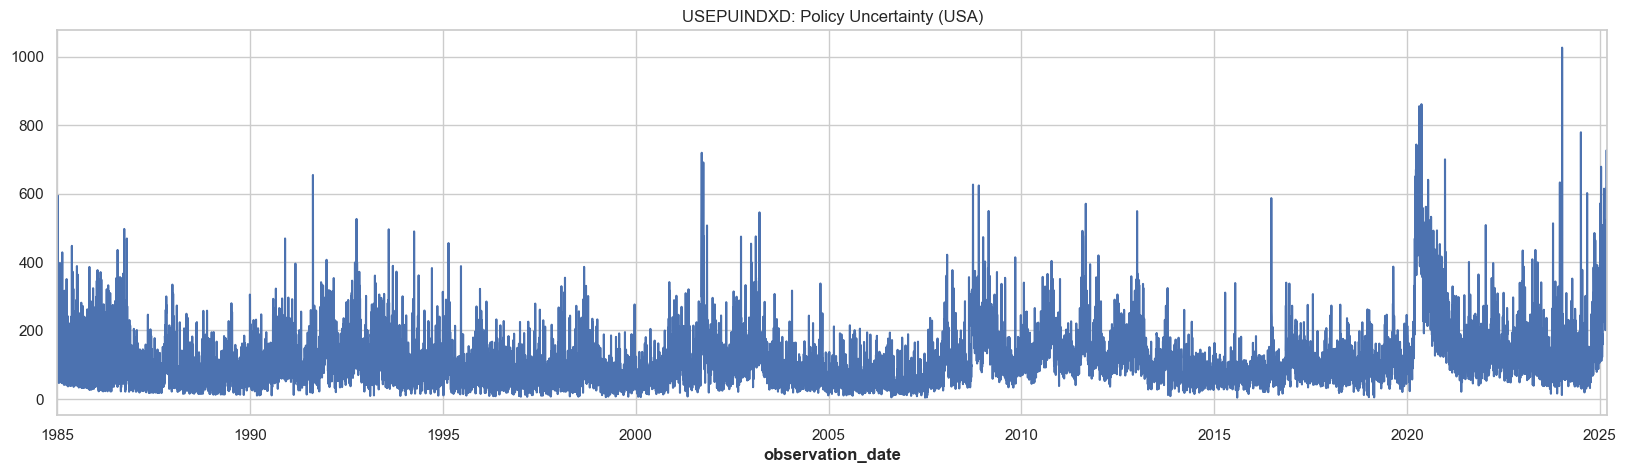

In [33]:
economic_uncertainty_USA = pd.read_csv("../data/USEPUINDXD.csv", parse_dates=["observation_date"], index_col="observation_date").squeeze()
data_ts.append(economic_uncertainty_USA)
data_ts[-1].plot()
plt.title("USEPUINDXD: Policy Uncertainty (USA)")

component  daily_policy_index
count             8859.000000
mean               279.157283
std                192.381231
min                  0.010000
10%                 95.480000
25%                150.335000
50%                235.340000
75%                361.290000
90%                513.022000
max               2660.720000
var    37006.360121


C:\Users\Avey\miniforge3\envs\astp\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\1921459673.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("var    %.6f" % np.var(df_ecounUSA))
C:\Users\Avey\AppData\Local\Temp\ipykernel_10976\256480645.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
h

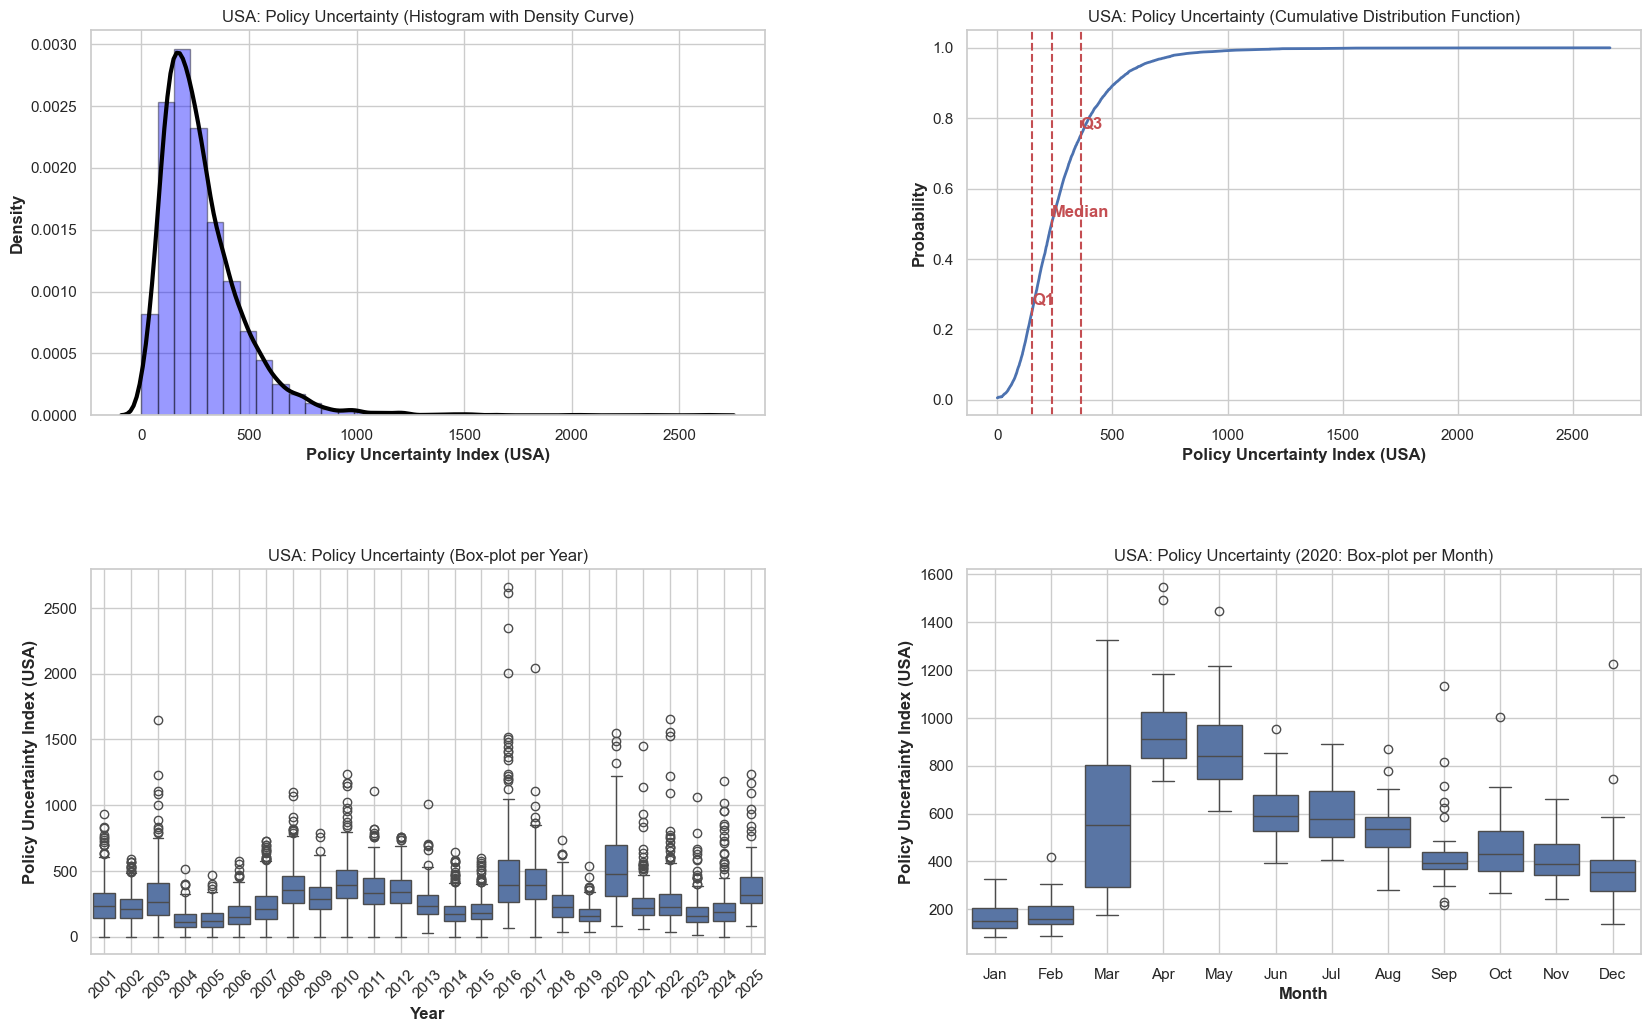

In [34]:
df_ecounUSA = data_ts[5].to_dataframe()
print(df_ecounUSA.describe(percentiles=[.1, .25, .5, .75, .9]))
print("var    %.6f" % np.var(df_ecounUSA))
stats_series(df_ecounUSA, serie="USA: Policy Uncertainty", label_serie="Policy Uncertainty Index (USA)", ano_mensal=2020)

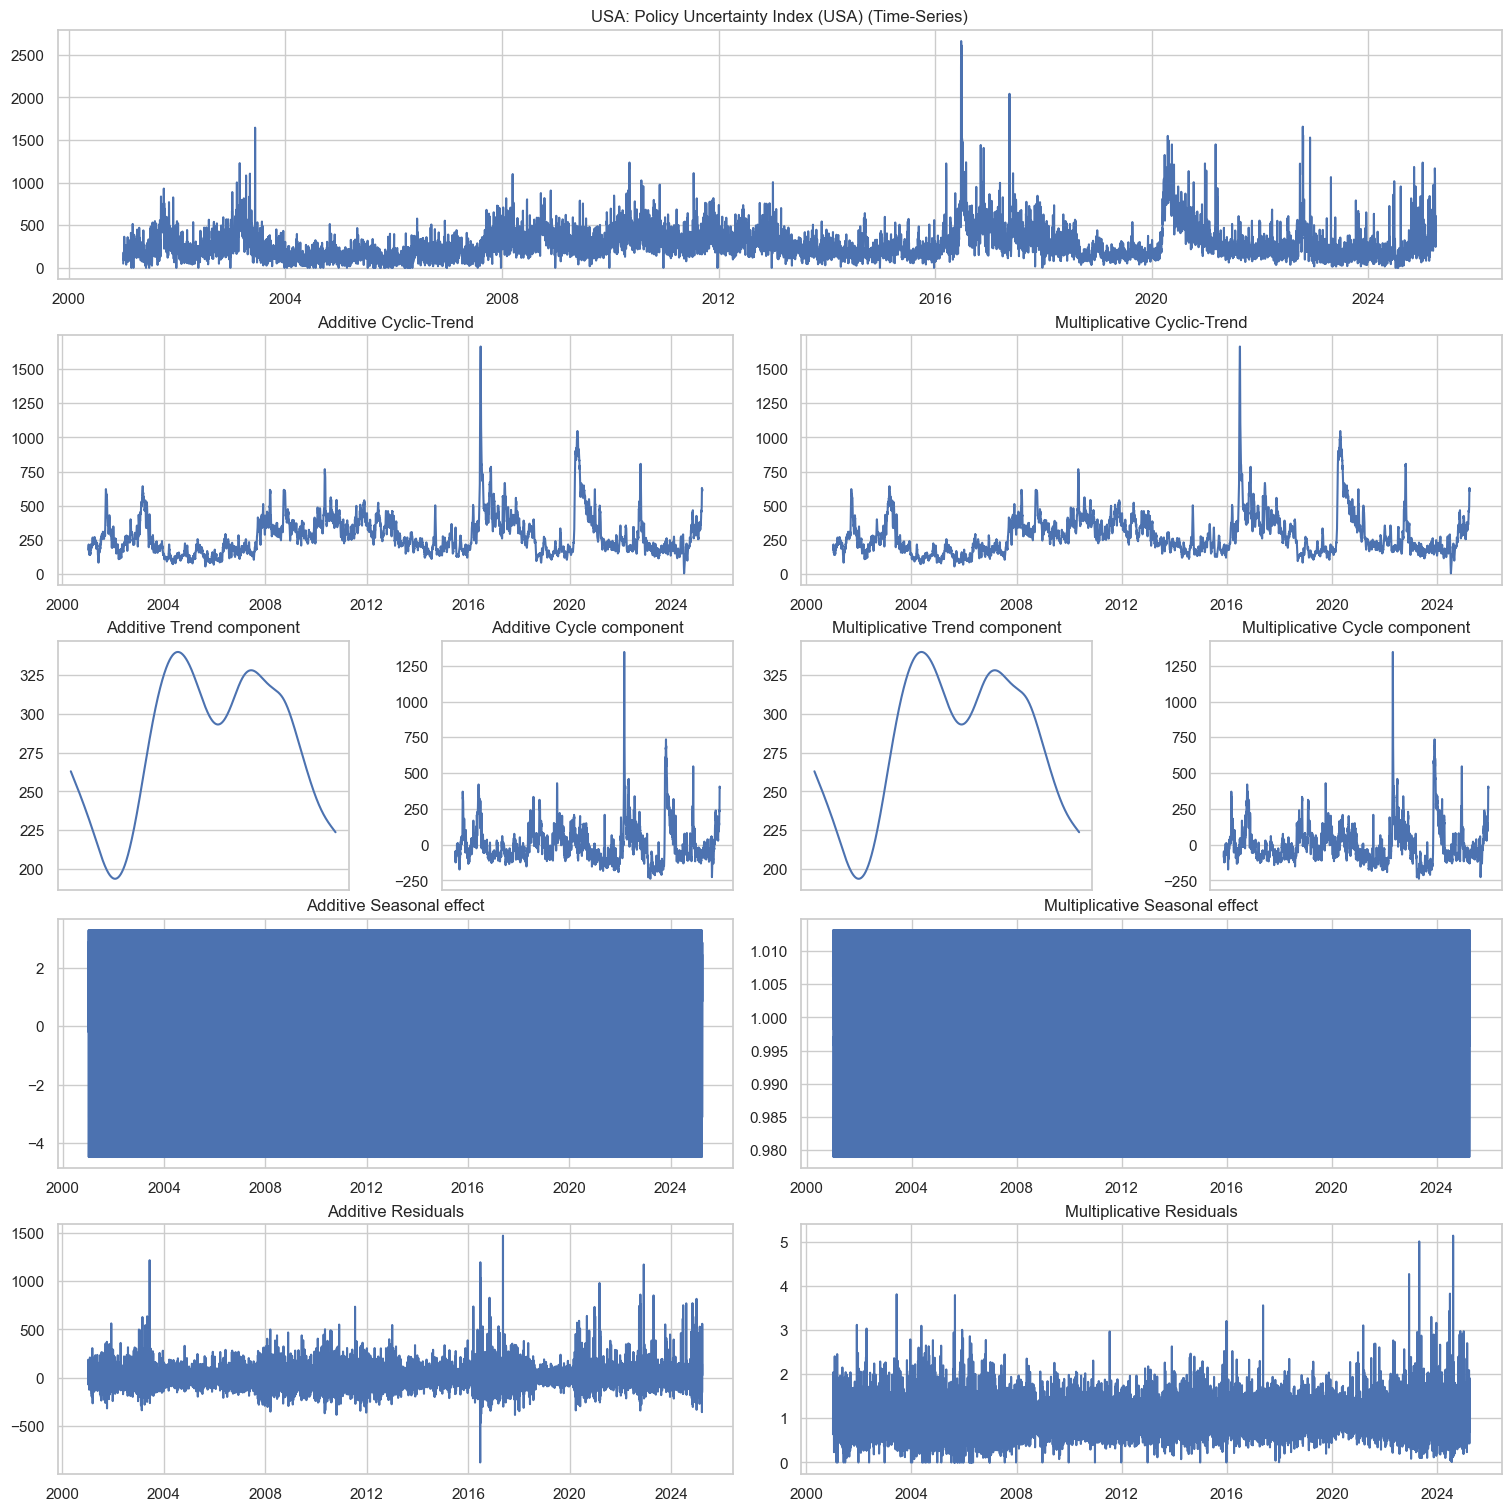

Time-Series Level is component
daily_policy_index    279.16
dtype: float64

Additive Time Series
Strenght of Trend: 0.3079
Strenght of Seasonality: 0.0000

Multiplicative Time Series
Strenght of Trend: 1.0000
Strenght of Seasonality: 0.0000


In [35]:
show_decompose(df_ecounUSA, seasonal_periods=12, title="USA: Policy Uncertainty Index (USA)")

In [36]:
# do kruskall-wallis
df_ecounUSA['month'] = df_ecounUSA.index.month
grupos = [grupo[1].values for grupo in df_ecounUSA.groupby('month')[df_ecounUSA.columns[0]]]
stat, p = kruskal(*grupos)
print(f"Kruskal-Wallis p-value: {p:.4f}")
if p < 0.05:
    print("-> A mediana dos grupos/entre anos é diferente.")
else:
    print("-> A mediana dos grupos/entre anos é a mesma.")

Kruskal-Wallis p-value: 0.0000
-> A mediana dos grupos/entre anos é diferente.


Já era de se esperar que a série não teria suspeitas de sazonalidade!

In [37]:
h0_time_series(df_ecounUSA, serie = "USA: Policy Uncertainty Index (USA)")

Estudar normalidade
Kurtosis Test for USA: Policy Uncertainty Index (USA)
Statistic: 41.9201
p-value: 0.0000
Kurtosis value: 12.6535
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Skew Test for USA: Policy Uncertainty Index (USA)
Statistic: 55.5720
p-value: 0.0000
Skewness value: 2.3241
Conclusion: Reject H0: Data is skewed
------------------------------------------------------
Jarque-Bera Test for USA: Policy Uncertainty Index (USA)
Statistic: 85661.3647
p-value: 0.0000
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Kolmogorov-Smirnov Test for USA: Policy Uncertainty Index (USA)
Statistic: 0.9934
p-value: 0.0000
Conclusion: Reject H0: Data is not from a normal distribution
------------------------------------------------------
Lagrange Multiplier Test for USA: Policy Uncertainty Index (USA)
Statistic: 3814.4327
p-value: 0.0000
Conclusion: Reject H0: Heteroscedasticity detected
---------

Tal como no UK, a série do USA diz-se estacionária segundo o teste do ADF, mas não estacionária (em tendência) segundo o teste do KPSS.

Veremos o teste do CUSUM com os mesmos parâmetros para o de UK.

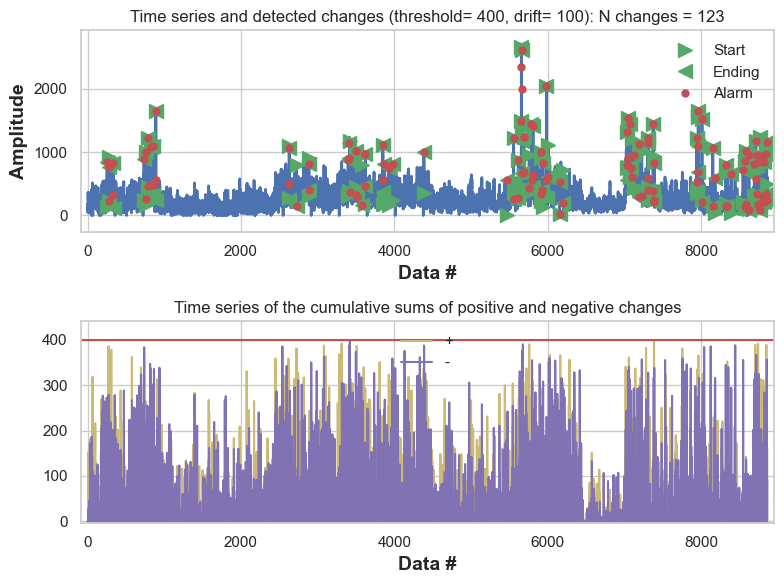

(array([ 255,  276,  277,  337,  338,  736,  767,  768,  786,  787,  829,
         830,  855,  856,  890,  891, 2627, 2629, 2726, 2884, 2886, 3396,
        3408, 3414, 3420, 3496, 3498, 3511, 3582, 3620, 3621, 3849, 3850,
        3870, 3927, 3934, 3982, 4384, 5472, 5553, 5555, 5614, 5615, 5653,
        5655, 5656, 5657, 5666, 5687, 5688, 5757, 5786, 5787, 5806, 5807,
        5912, 5916, 5917, 5935, 5980, 5981, 6005, 6153, 6154, 6193, 7027,
        7028, 7048, 7050, 7076, 7078, 7091, 7118, 7189, 7190, 7225, 7299,
        7300, 7308, 7309, 7371, 7372, 7384, 7385, 7387, 7940, 7941, 7959,
        7960, 7962, 8008, 8009, 8149, 8150, 8178, 8317, 8319, 8334, 8387,
        8543, 8570, 8571, 8576, 8577, 8620, 8621, 8690, 8710, 8711, 8720,
        8721, 8740, 8754, 8755, 8767, 8769, 8808, 8815, 8816, 8841, 8842,
        8850, 8855]),
 array([ 252,  274,  276,  336,  337,  735,  765,  767,  784,  786,  828,
         829,  853,  855,  888,  890, 2625, 2628, 2725, 2883, 2885, 3395,
        3407, 34

In [38]:
# TODO: ver melhor threshold e drift - MUDAR TAMBEM PARA O UK!!!
#Manual values
threshold=400 #increases the amplitude, raising the alarm zone barrier
drift = 100;
df_ecounUSA

detect_cusum(df_ecounUSA[df_ecounUSA.columns[0]].values, threshold, drift, True, True)

In [39]:
# TODO: OUTRAS SERIES... SÓ NÃO FIZ PELA ESCALA DAS MESMAS (JULHO A JULHO) E PORQUE PARECEM TER SÓ UMA TENDENCIA

# <a class='anchor' id='4'></a>

> # **4. Extra** 

In [40]:
data_ts[0].start_time()

Timestamp('2020-02-01 00:00:00')

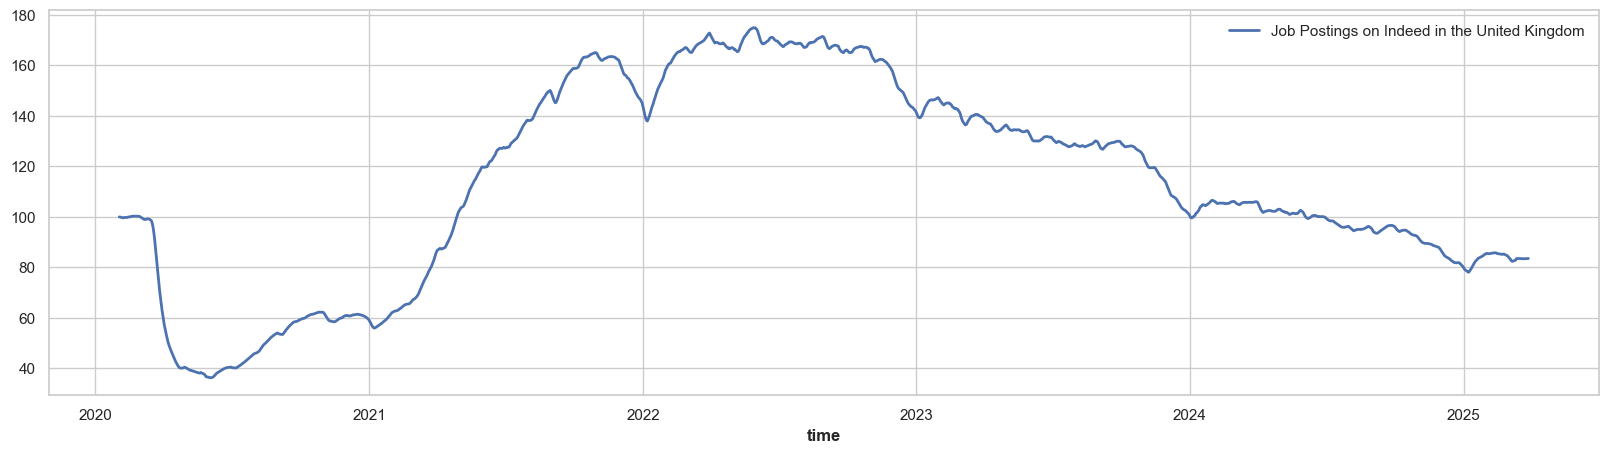

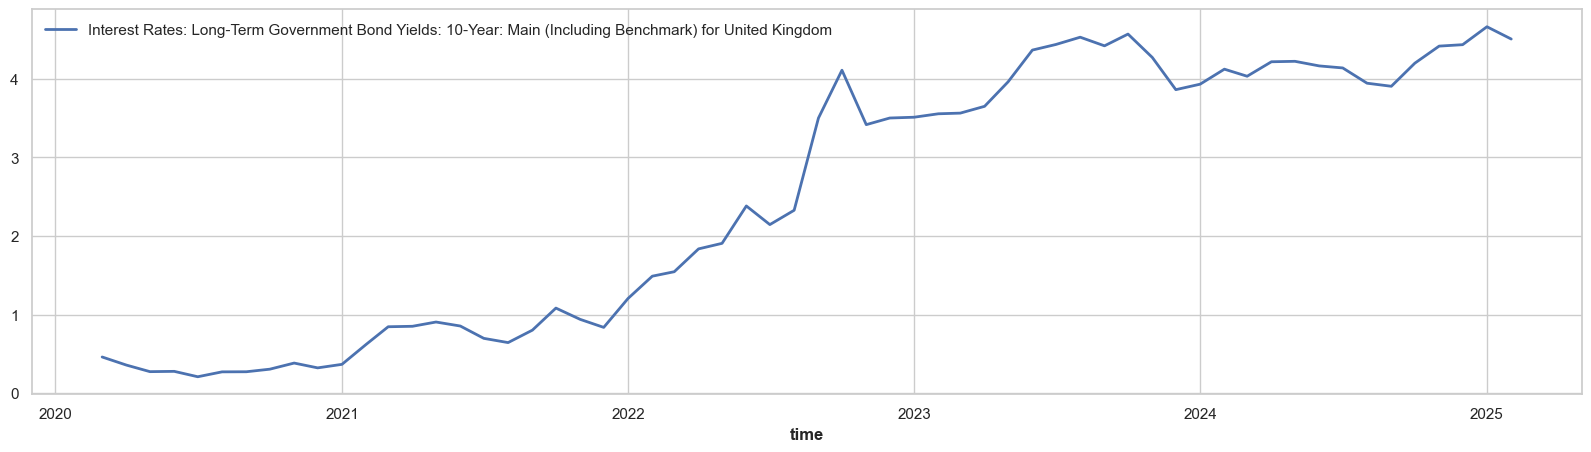

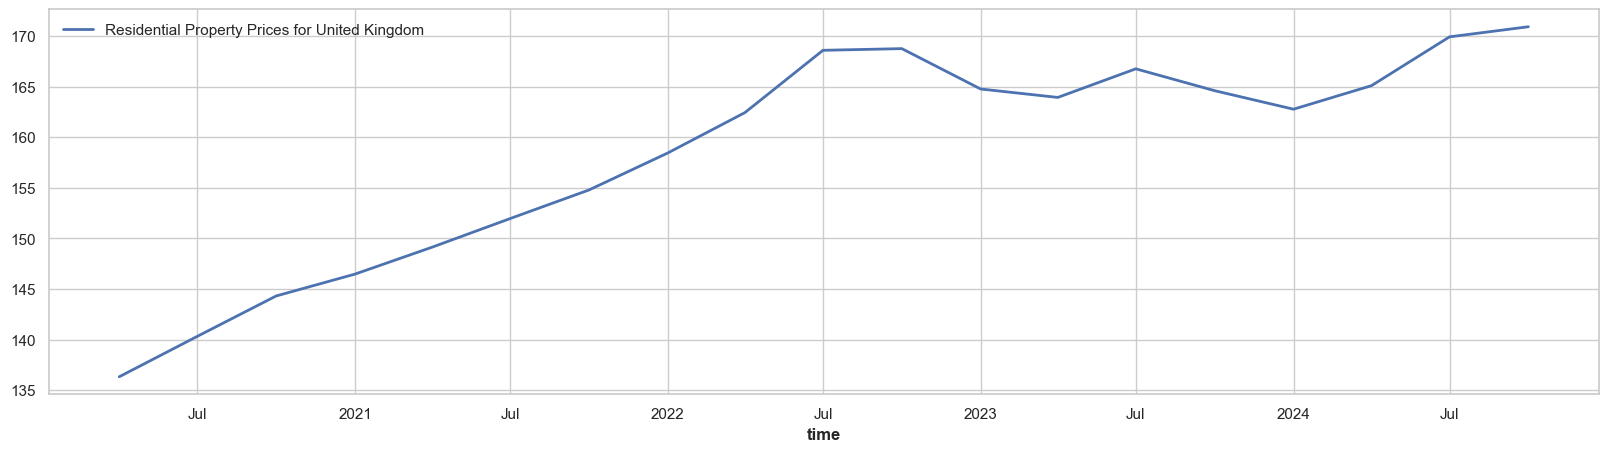

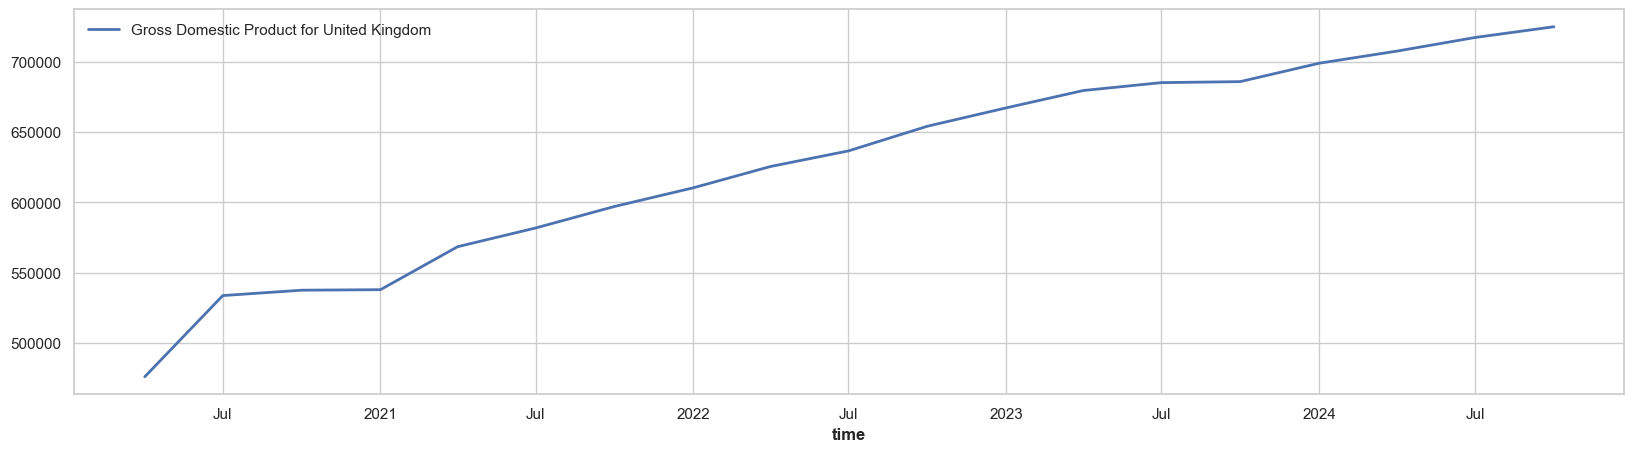

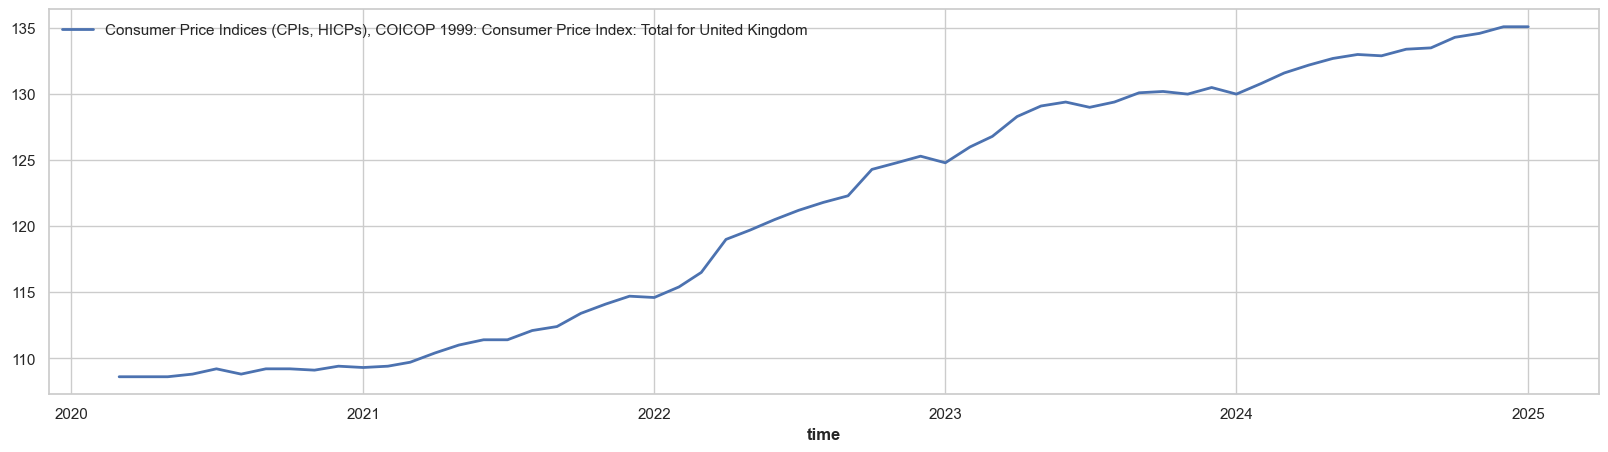

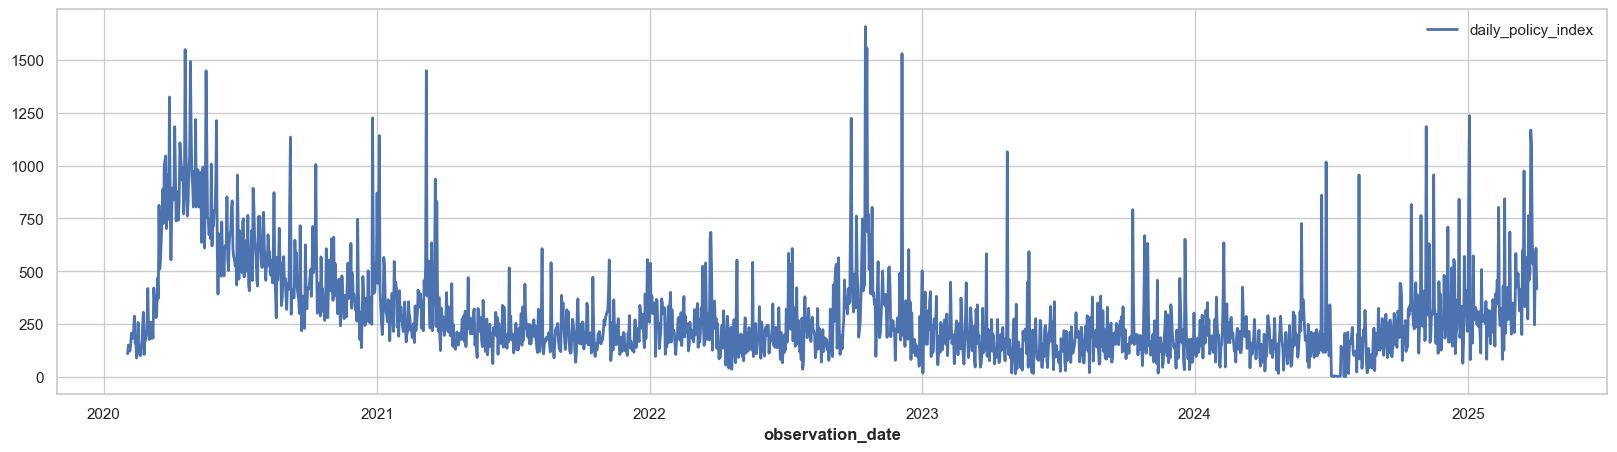

AttributeError: 'Series' object has no attribute 'drop_before'

In [41]:
for ts in data_ts:
    ts.drop_before(data_ts[0].start_time()).plot()
    plt.show()

# First experiment: Job Listings on Indeed UK

In [ ]:
series = data_ts[0]

In [ ]:
# Feature extraction
df = pd.DataFrame(data[0])

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df.reset_index(inplace=True)
df['week'] = df['time'].dt.isocalendar().week
df['day'] = df['time'].dt.dayofweek
df['day_str'] = df['time'].dt.strftime('%a')
df['year_month'] = df['time'].dt.strftime('%Y_%m')
df.set_index('time', inplace=True)

In [ ]:
for year in df["year"].unique():
    plt.plot("month", "Job Postings on Indeed in the United Kingdom", data=df[df["year"] == year])
plt.show()

In [ ]:
data[0].describe()

In [ ]:
train, val = data_ts[0][:-90], data_ts[0][-90:]

In [ ]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

In [ ]:
data_ts[0].plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [ ]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

In [ ]:
data_ts[0].plot()
(anom_score).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom).plot(label="detected binary anomaly", lw=4)
plt.show()